# Data collection 

Collecting the relevant datasets to explore our problem

Firstly I want to see what features impact whether a crash is fatal or not and I want to see the distribution of all crashes which are fatal

In [1]:
import pandas as pd


crash_people = pd.read_csv('C:/Users/ekmho/Documents/GitHub/Europe Regional 2023 Datasets/Crashes/crash_info_people.csv')


C:\Users\ekmho\AppData\Local\Temp\ipykernel_2576\3002692852.py:4: DtypeWarning: Columns (3,9,10,11,18) have mixed types. Specify dtype option on import or set low_memory=False.
  crash_people = pd.read_csv('C:/Users/ekmho/Documents/GitHub/Europe Regional 2023 Datasets/Crashes/crash_info_people.csv')


In [25]:
crash_general = pd.read_csv('C:/Users/ekmho/Documents/GitHub/Europe Regional 2023 Datasets/Crashes/crash_info_general.csv')


C:\Users\ekmho\AppData\Local\Temp\ipykernel_2576\3111603682.py:1: DtypeWarning: Columns (97,98,99) have mixed types. Specify dtype option on import or set low_memory=False.
  crash_general = pd.read_csv('C:/Users/ekmho/Documents/GitHub/Europe Regional 2023 Datasets/Crashes/crash_info_general.csv')


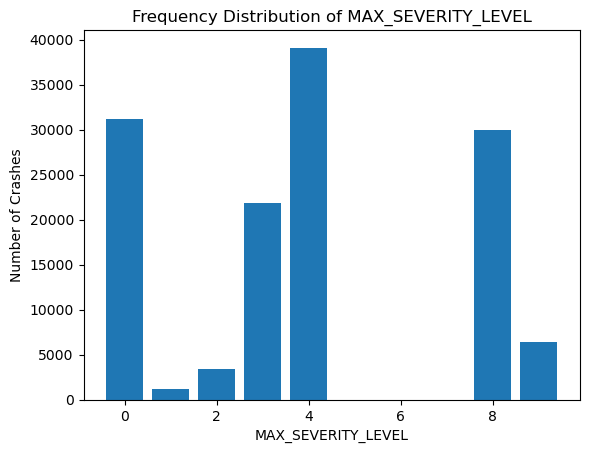

In [3]:
#Looking at the distribution of the severity level of crashes

import matplotlib.pyplot as plt

# Count the number of occurrences of each category
severity_counts = crash_general['MAX_SEVERITY_LEVEL'].value_counts()

# Create a bar chart of the frequency distribution
plt.bar(severity_counts.index, severity_counts.values)

# Add title and axis labels
plt.title('Frequency Distribution of MAX_SEVERITY_LEVEL')
plt.xlabel('MAX_SEVERITY_LEVEL')
plt.ylabel('Number of Crashes')

# Display the chart
plt.show()

In [75]:
crash_flag = crash_flag = pd.read_csv('C:/Users/ekmho/Documents/GitHub/Europe Regional 2023 Datasets/Crashes/crash_info_flag_variables.csv')


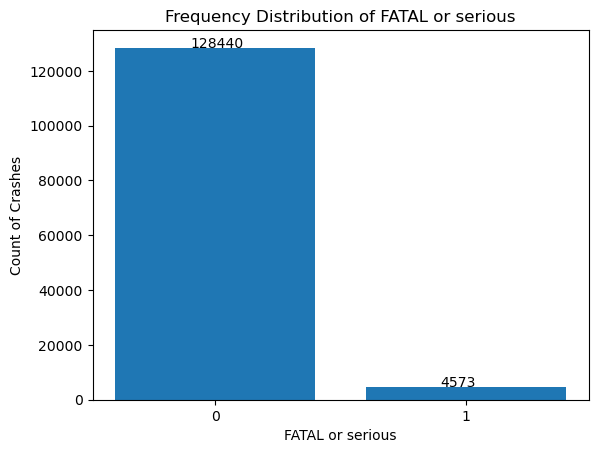

In [26]:
#Looking at the number of fatal accidents
import matplotlib.pyplot as plt

# Count the number of occurrences of each value
fatal_counts = crash_flag['FATAL_OR_SUSP_SERIOUS_INJ'].value_counts()

# Create a bar chart of the frequency distribution
plt.bar(fatal_counts.index.astype(str), fatal_counts.values)

# Show the counts above each bar
for i, v in enumerate(fatal_counts.values):
    plt.text(i - 0.1, v + 50, str(v))

# Add title and axis labels
plt.title('Frequency Distribution of FATAL or serious')
plt.xlabel('FATAL or serious')
plt.ylabel('Count of Crashes')

# Display the chart
plt.show()

Because not many of the accidents are fatal it might be useful to classify whether or not an accident will be fatal rather than trying to predict the fatality rate

In [27]:
#Looking at the distribution of driver states for fatal or serious crashes

fatal_or_serious_crns = crash_flag.loc[crash_flag['FATAL_OR_SUSP_SERIOUS_INJ'] == 1, 'CRN'].tolist()

fatal_serious_crash_people = crash_people[crash_people['CRN'].isin(fatal_or_serious_crns)]

len(fatal_serious_crash_people)

#This shows that for the 4573 fatal or serious crashes there were 13,951 involved people who subsequently died or were fatally injured

13951

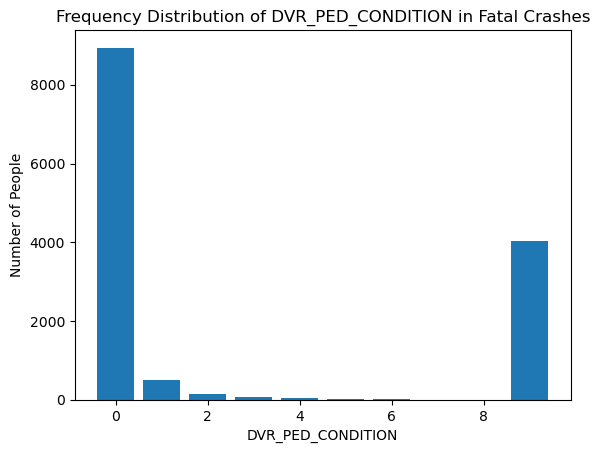

In [28]:
# Count the number of occurrences of each category
condition_counts = fatal_serious_crash_people['DVR_PED_CONDITION'].value_counts()

# Create a bar chart of the frequency distribution
plt.bar(condition_counts.index, condition_counts.values)

# Add title and axis labels
plt.title('Frequency Distribution of DVR_PED_CONDITION in Fatal Crashes')
plt.xlabel('DVR_PED_CONDITION')
plt.ylabel('Number of People')

# Display the chart
plt.show()

<b> Now I want to see what possible predictors could be used to predict whether a crash is fatal or causes severe injury 

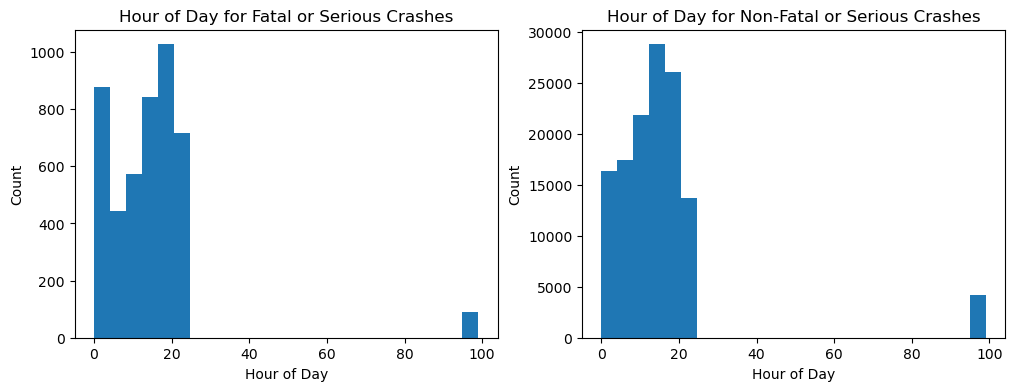

In [38]:
# Create two dataframes, one for rows with CRNs in the fatal_or_serious_crns list and another for rows not in the list
fatal_or_serious_crash_data = crash_general[crash_general['CRN'].isin(fatal_or_serious_crns)]
non_fatal_or_serious_crash_data = crash_general[~crash_general['CRN'].isin(fatal_or_serious_crns)]


# Create two subplots side-by-side
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))

# Create a histogram of HOUR_OF_DAY for fatal or serious crashes
axs[0].hist(fatal_or_serious_crash_data['HOUR_OF_DAY'], bins=24)
axs[0].set_xlabel('Hour of Day')
axs[0].set_ylabel('Count')
axs[0].set_title('Hour of Day for Fatal or Serious Crashes')

# Create a histogram of HOUR_OF_DAY for non-fatal or serious crashes
axs[1].hist(non_fatal_or_serious_crash_data['HOUR_OF_DAY'], bins=24)
axs[1].set_xlabel('Hour of Day')
axs[1].set_ylabel('Count')
axs[1].set_title('Hour of Day for Non-Fatal or Serious Crashes')

plt.show()

This shows that more fatal or serious crashes happen at night time

0         22.0
1          6.0
2         11.0
3          6.0
4          0.0
          ... 
133006    21.0
133008    16.0
133010     9.0
133011    14.0
133012    14.0
Name: HOUR_OF_DAY, Length: 128440, dtype: float64

0         22.0
1          6.0
2         11.0
3          6.0
4          0.0
          ... 
133006    21.0
133008    16.0
133010     9.0
133011    14.0
133012    14.0
Name: HOUR_OF_DAY, Length: 128440, dtype: float64

,CRN,AGE,AIRBAG_PADS,AIRBAG1,AIRBAG2,AIRBAG3,AIRBAG4,CLOTHING_TYPE,DVR_PED_CONDITION,EJECTION_IND,...,SEAT_POSITION,SEX,TRANSPORTED,UNIT_NUM,DVR_LIC_STATE,DRUG_RESULT_CD1,DRUG_RESULT_CD2,DRUG_RESULT_CD3,DRUG_RESULT_CD4,FATAL_OR_SERIOUS_CRASH
1,2022000001,29,9.0,0.0,NaN,NaN,NaN,,9.0,1,...,1,M,N,1,PA,NaN,NaN,NaN,NaN,0
3,2022000001,29,9.0,0.0,NaN,NaN,NaN,,9.0,1,...,1,M,N,1,PA,NaN,NaN,NaN,NaN,0
4,2022000025,34,0.0,97.0,NaN,NaN,NaN,,0.0,0,...,1,M,N,1,PA,NaN,NaN,NaN,NaN,0
6,2022000028,16,19.0,NaN,NaN,NaN,NaN,,0.0,0,...,1,M,Y,1,,NaN,NaN,NaN,NaN,0
8,2022000031,34,8.0,1.0,2.0,3.0,NaN,,0.0,1,...,1,M,Y,1,PA,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370866,2014125058,36,0.0,NaN,NaN,NaN,NaN,,0.0,0,...,1,M,N,2,,NaN,NaN,NaN,NaN,0
370871,2014095877,99,99.0,NaN,NaN,NaN,NaN,,9.0,1,...,1,U,,1,,NaN,NaN,NaN,NaN,0
370872,2014104448,35,9.0,NaN,NaN,NaN,NaN,,0.0,0,...,1,F,N,3,PA,NaN,NaN,NaN,NaN,0
370874,2014018194,27,8.0,M,NaN,NaN,NaN,,0.0,1,...,1,M,N,1,PA,NaN,NaN,NaN,NaN,0


# Trying to predict whether a crash will be fatal or not based on road conditions

In [115]:
road_condition_features = ['CRN', 'FATAL_OR_SUSP_SERIOUS_INJ', 'CURVED_ROAD', 'HIT_BARRIER', 'HIT_BRIDGE', 'HIT_EMBANKMENT', 
                           'HIT_GDRAIL', 'HIT_GDRAIL_END', 'HIT_POLE', 'HIT_TREE_SHRUB', 'ICY_ROAD', 'ILLUMINATION_DARK',
                          'INTERSECTION', 'INTERSTATE', 'LIMIT_65MPH', 'LIMIT_70MPH', 'LOCAL_ROAD', 'LOCAL_ROAD_ONLY',
                          'OTHER_FREEWAY', 'RAMP', 'SHLDR_RELATED', 'SIGNALIZED_INT', 'SNOW_SLUSH_ROAD', 'STOP_CONTROLLED_INT',
                          'TURNPIKE', 'UNSIGNALIZED_INT', 'WET_ROAD', 'WORK_ZONE']
df = crash_flag.loc[:, road_condition_features]

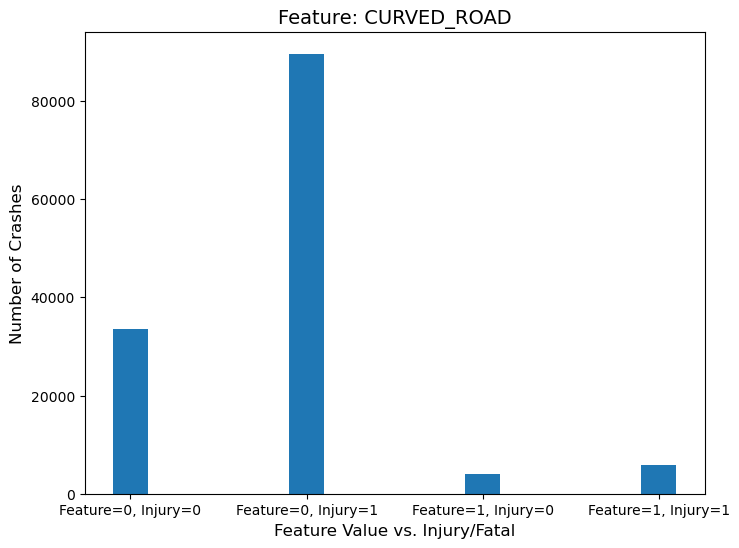

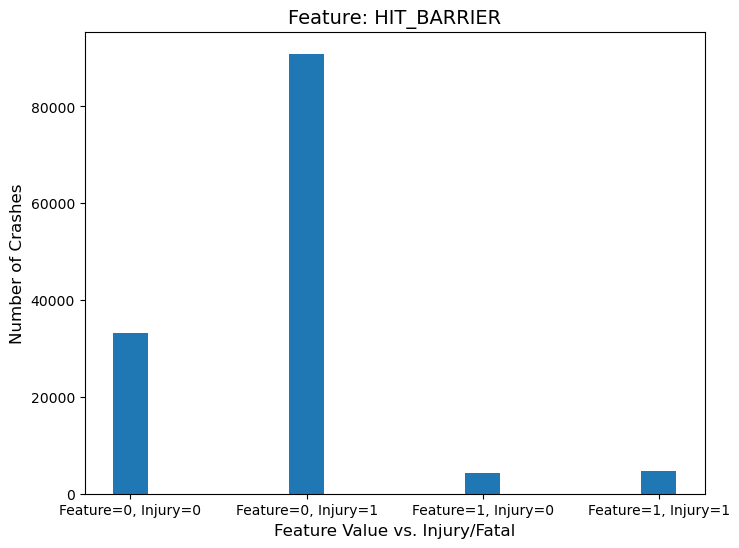

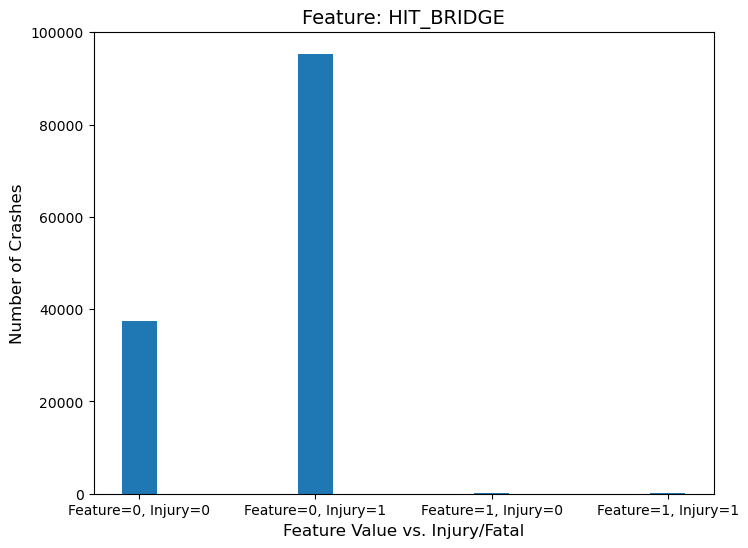

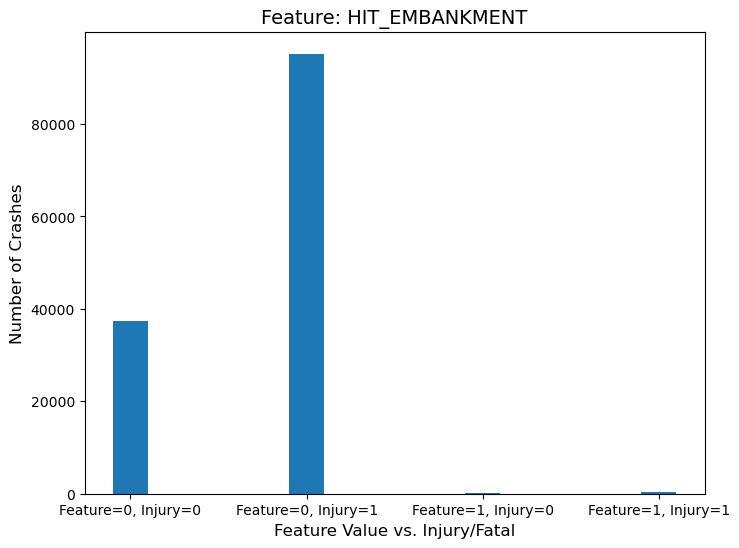

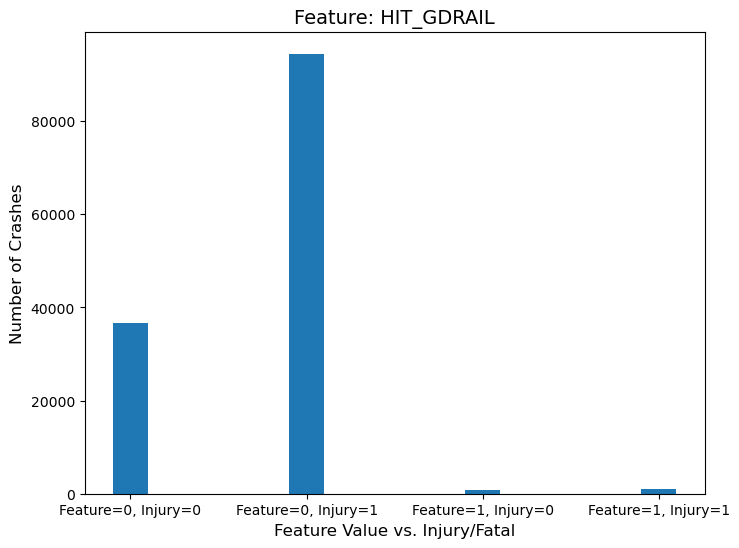

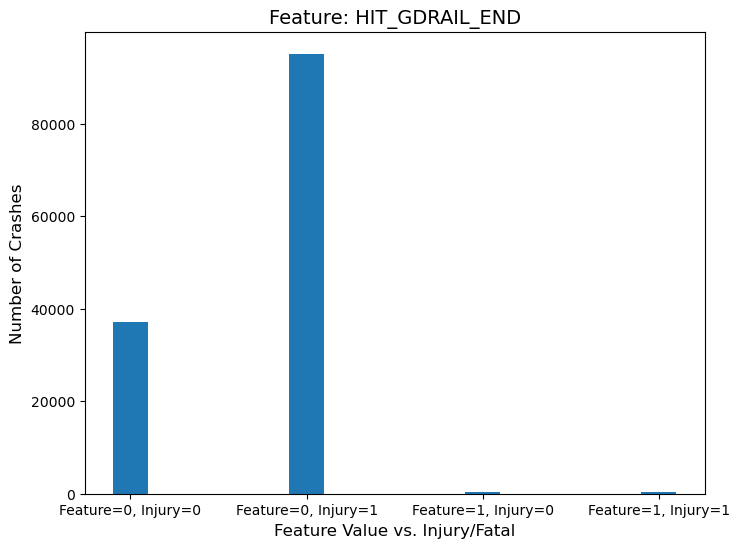

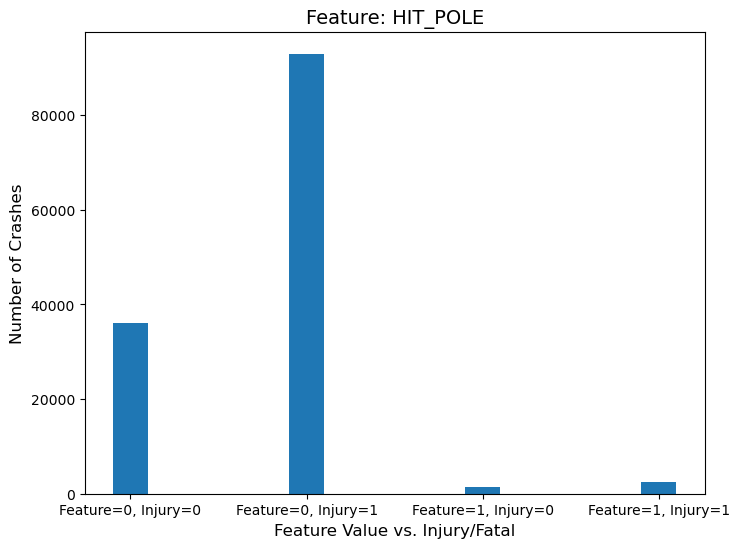

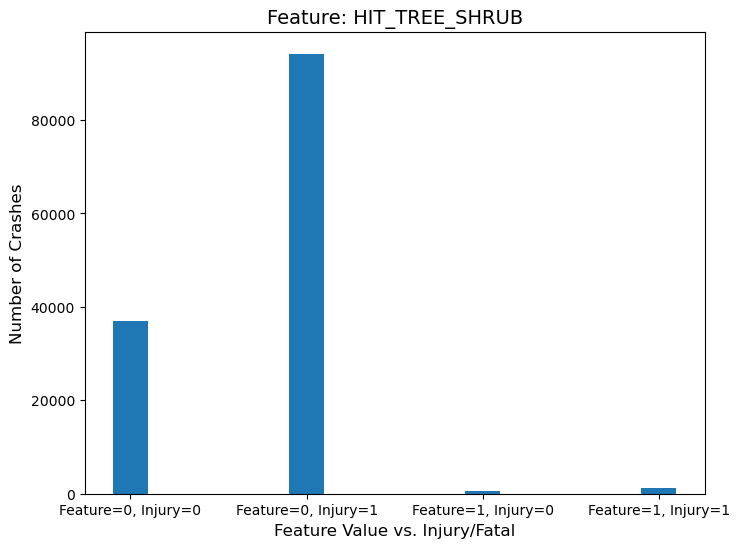

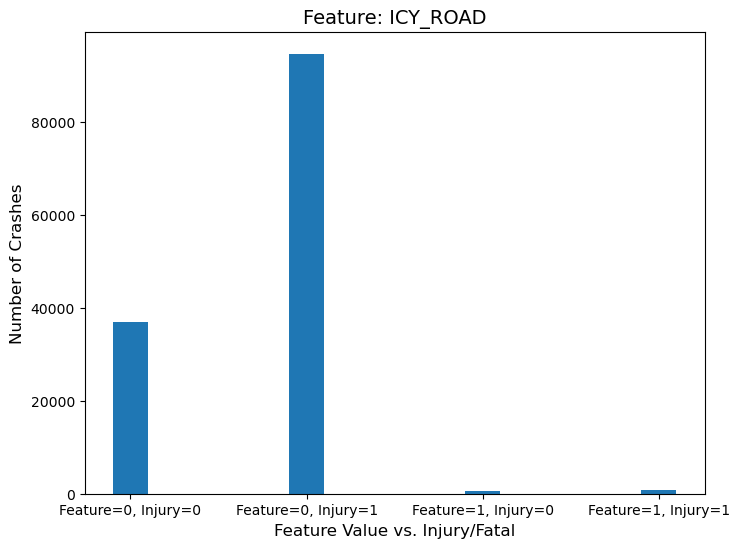

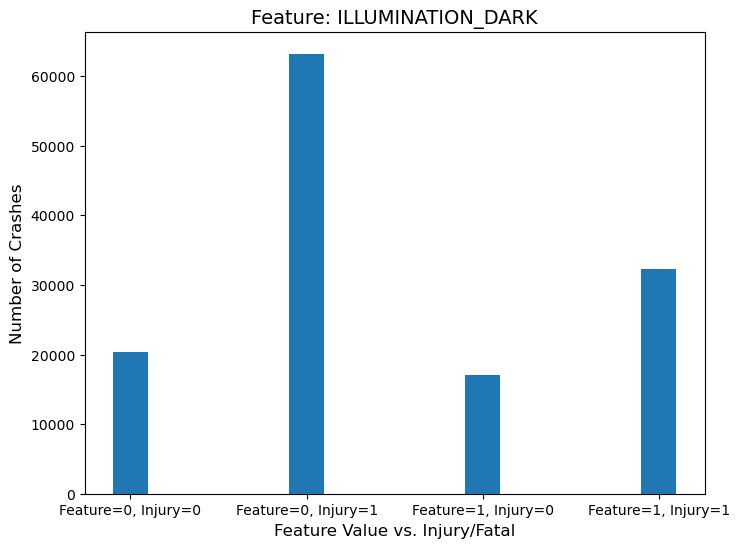

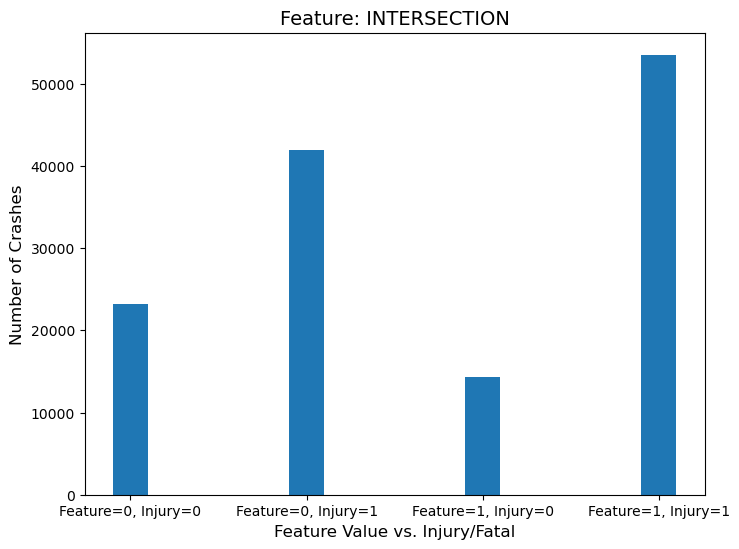

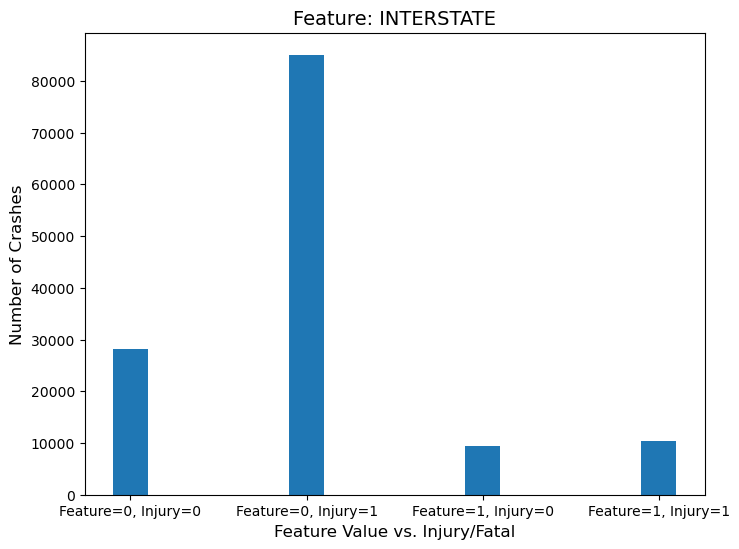

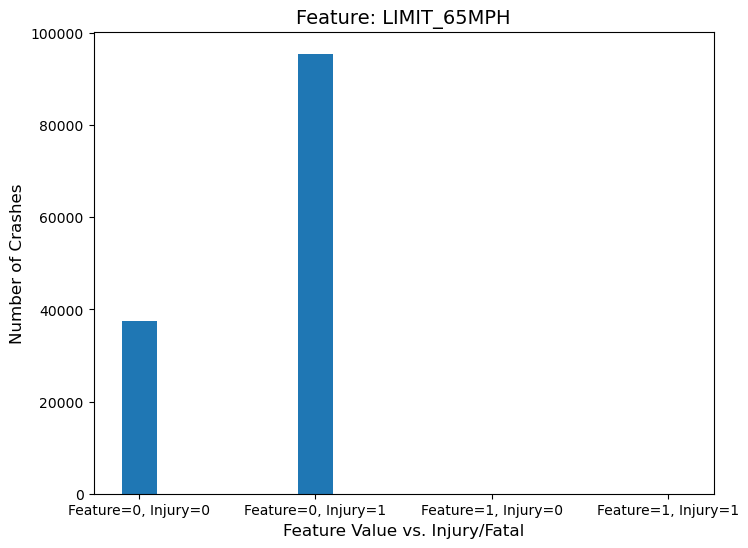

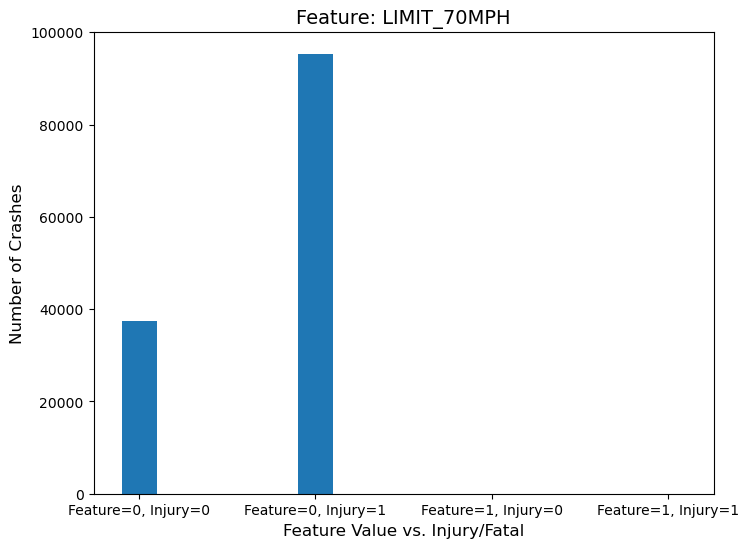

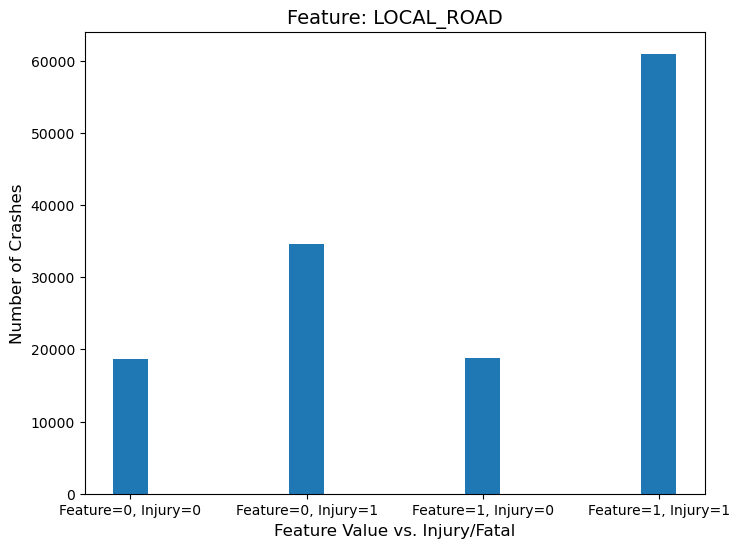

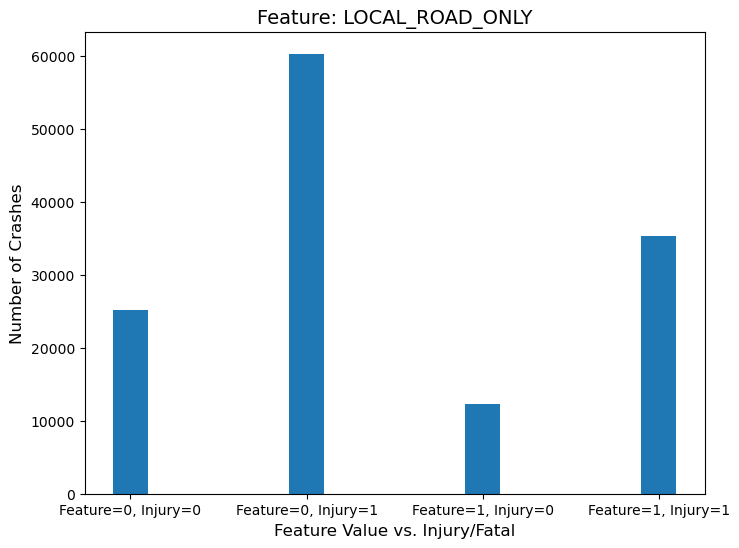

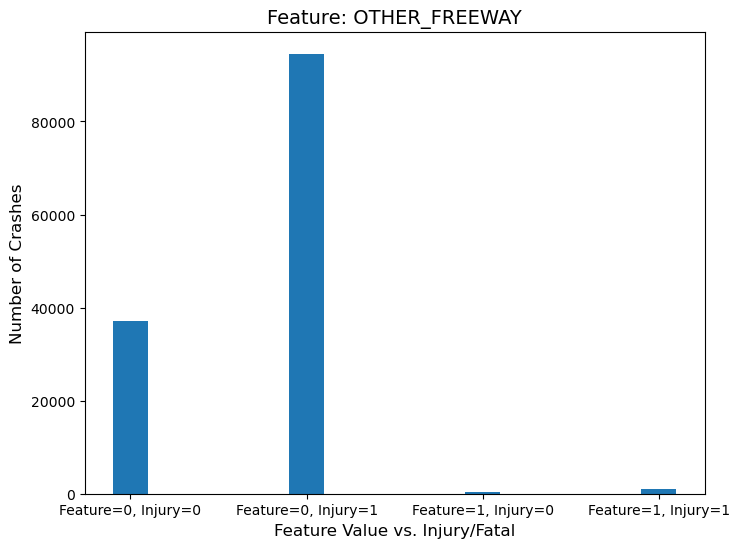

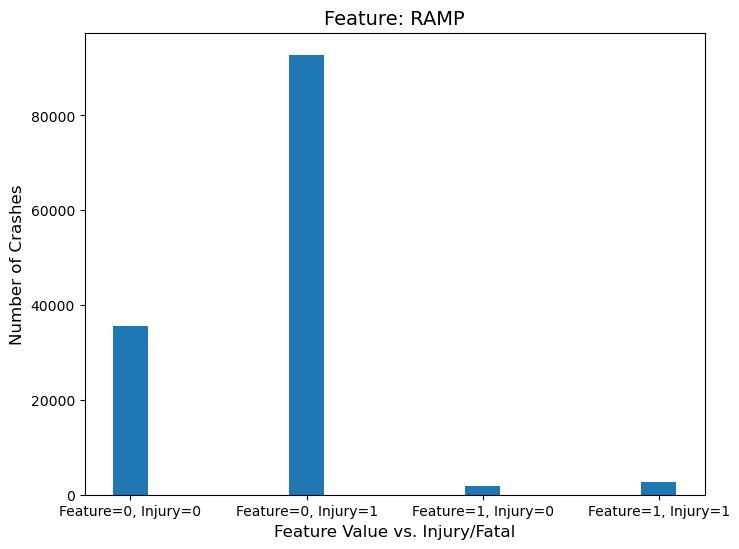

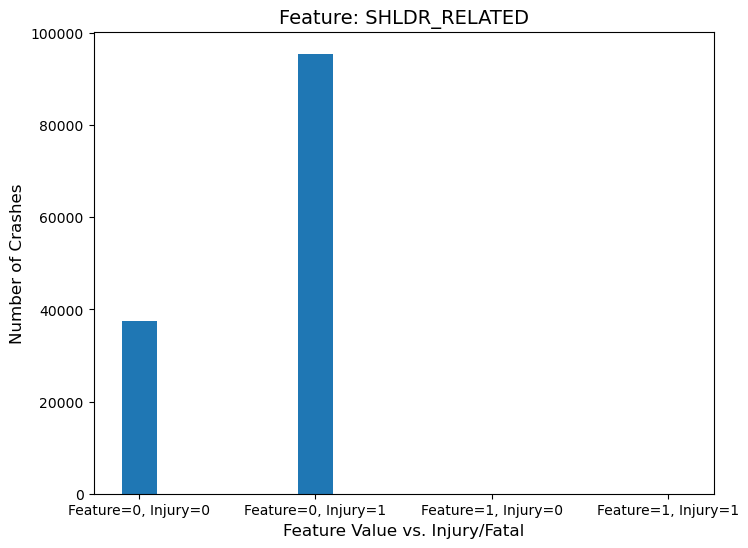

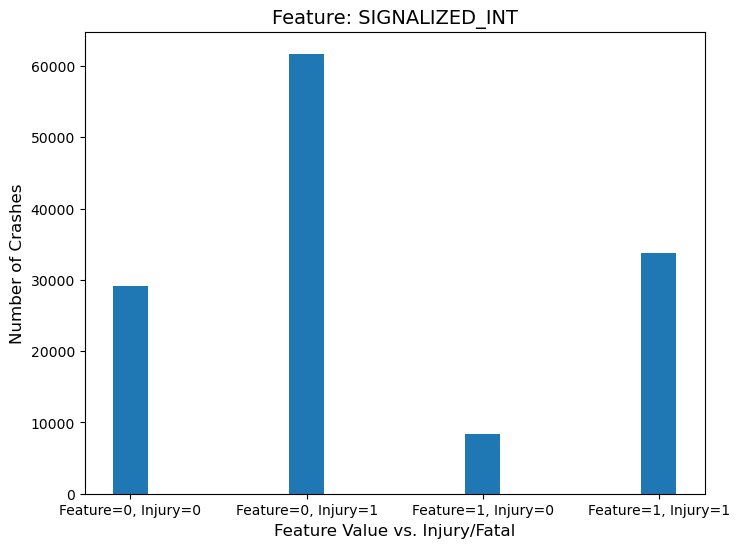

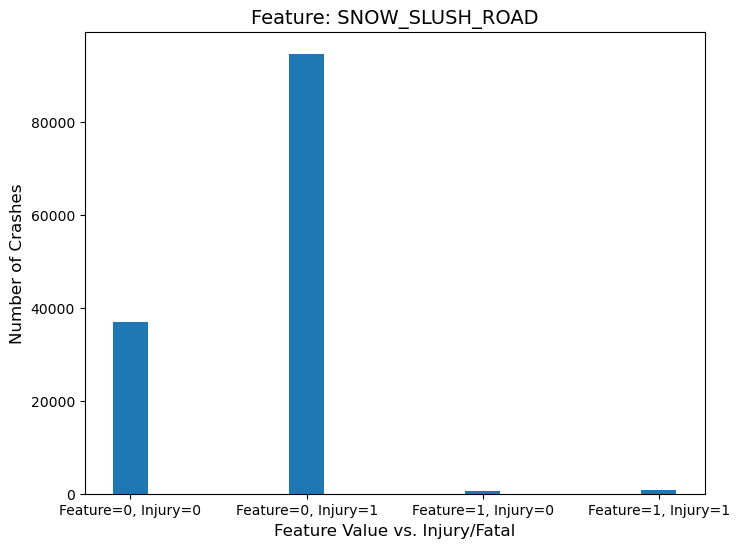

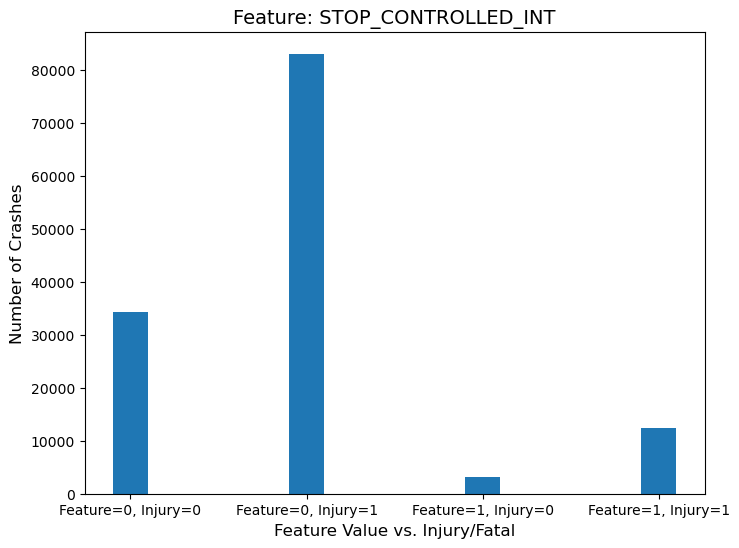

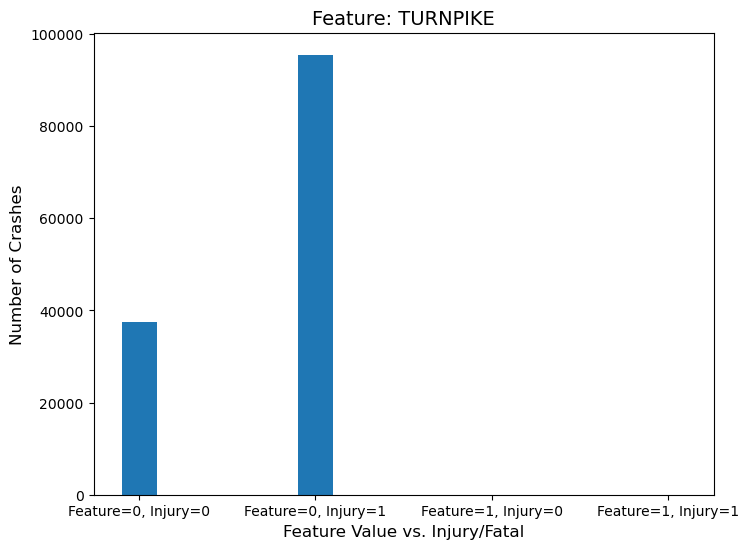

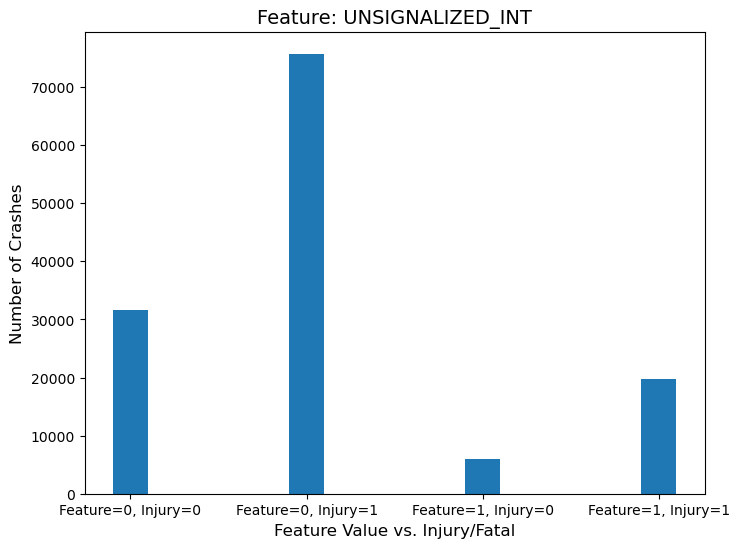

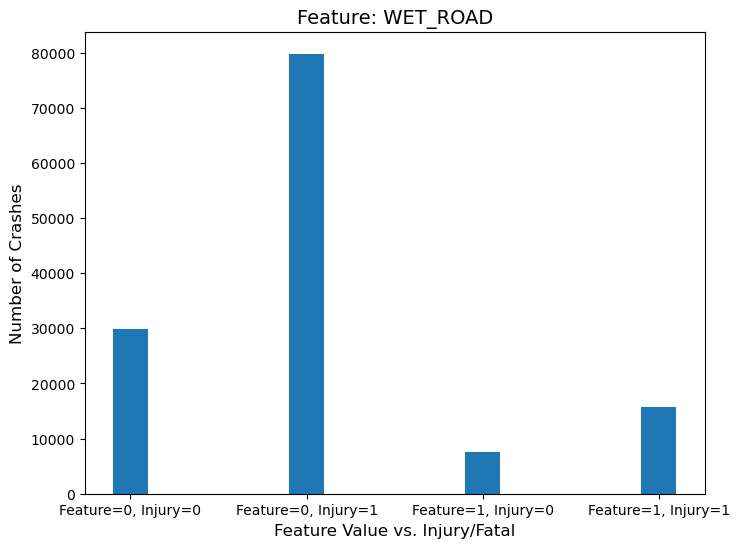

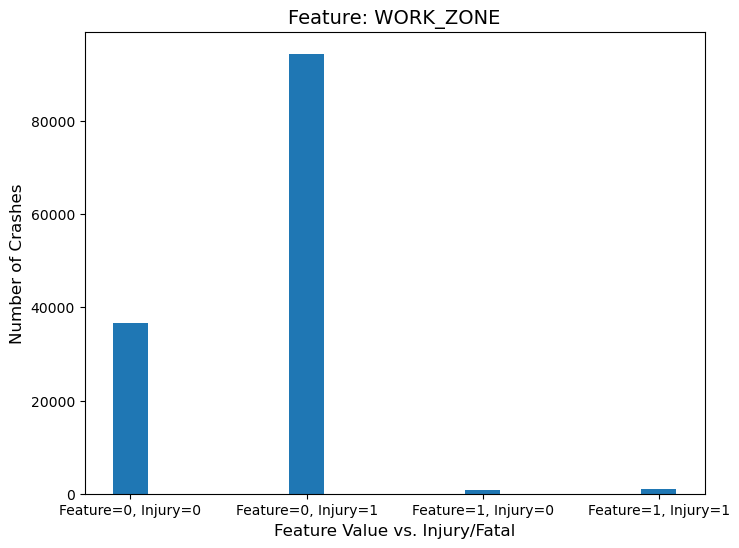

In [114]:
features = [ 'CURVED_ROAD', 'HIT_BARRIER', 'HIT_BRIDGE', 'HIT_EMBANKMENT', 
                           'HIT_GDRAIL', 'HIT_GDRAIL_END', 'HIT_POLE', 'HIT_TREE_SHRUB', 'ICY_ROAD', 'ILLUMINATION_DARK',
                          'INTERSECTION', 'INTERSTATE', 'LIMIT_65MPH', 'LIMIT_70MPH', 'LOCAL_ROAD', 'LOCAL_ROAD_ONLY',
                          'OTHER_FREEWAY', 'RAMP', 'SHLDR_RELATED', 'SIGNALIZED_INT', 'SNOW_SLUSH_ROAD', 'STOP_CONTROLLED_INT',
                          'TURNPIKE', 'UNSIGNALIZED_INT', 'WET_ROAD', 'WORK_ZONE']


# Initialize lists to store counts
zero_zero_counts = []
zero_one_counts = []
one_zero_counts = []
one_one_counts = []

# Loop through the features and calculate the counts
for feature in features:
    zero_zero = len(df[(df[feature] == 0) & (df['INJURY_OR_FATAL'] == 0)])
    zero_one = len(df[(df[feature] == 0) & (df['INJURY_OR_FATAL'] == 1)])
    one_zero = len(df[(df[feature] == 1) & (df['INJURY_OR_FATAL'] == 0)])
    one_one = len(df[(df[feature] == 1) & (df['INJURY_OR_FATAL'] == 1)])
    
    zero_zero_counts.append(zero_zero)
    zero_one_counts.append(zero_one)
    one_zero_counts.append(one_zero)
    one_one_counts.append(one_one)

    # Set up the bar plot
    fig, ax = plt.subplots(figsize=(8, 6))
    bar_width = 0.2
    index = range(4)

    # Plot the bars
    ax.bar(index, [zero_zero, zero_one, one_zero, one_one], bar_width)

    # Set the axis labels, ticks, and title
    ax.set_xlabel('Feature Value vs. Injury/Fatal', fontsize=12)
    ax.set_ylabel('Number of Crashes', fontsize=12)
    ax.set_xticks(index)
    ax.set_xticklabels(['Feature=0, Injury=0', 'Feature=0, Injury=1', 'Feature=1, Injury=0', 'Feature=1, Injury=1'], fontsize=10)
    ax.set_title('Feature: {}'.format(feature), fontsize=14)

    # Display the plot
    plt.show()


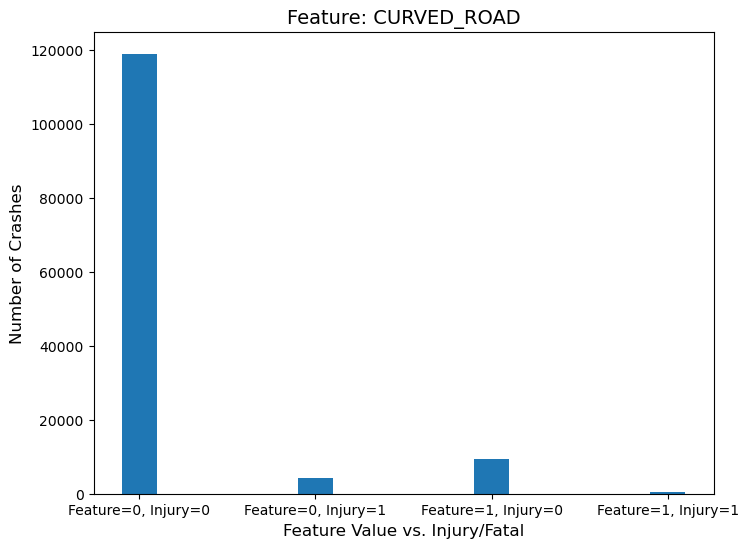

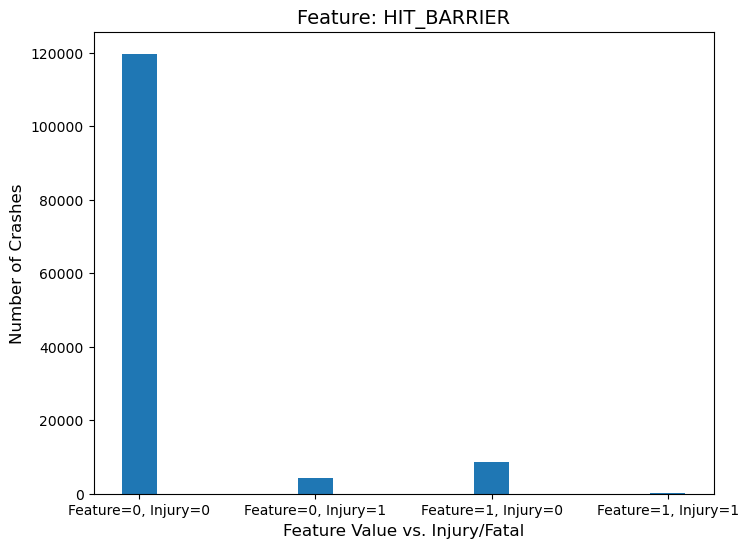

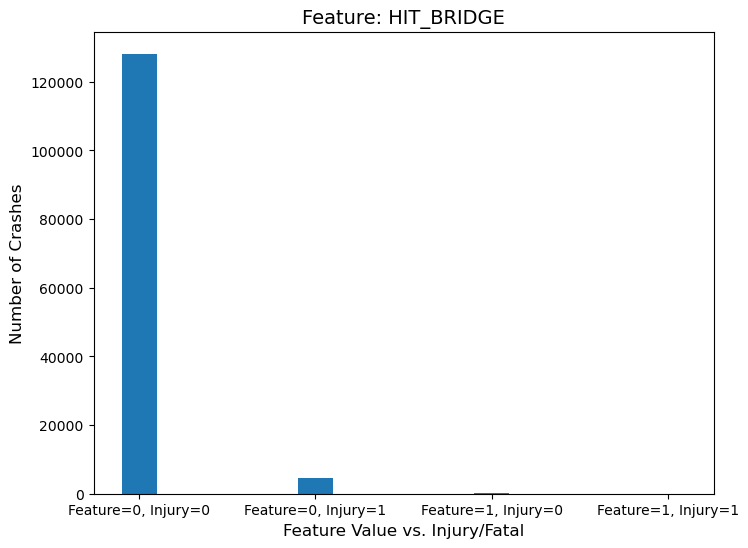

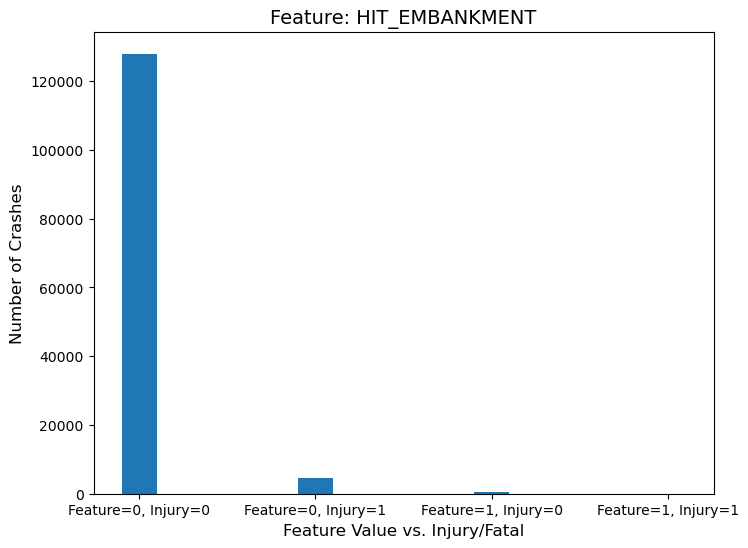

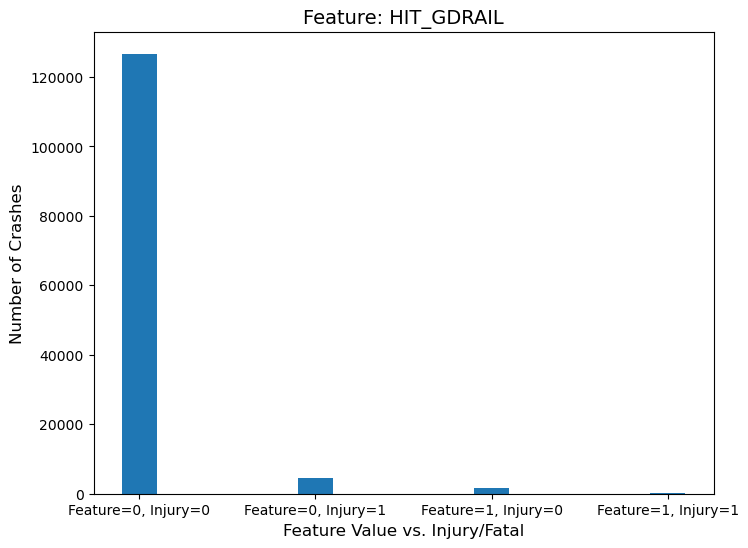

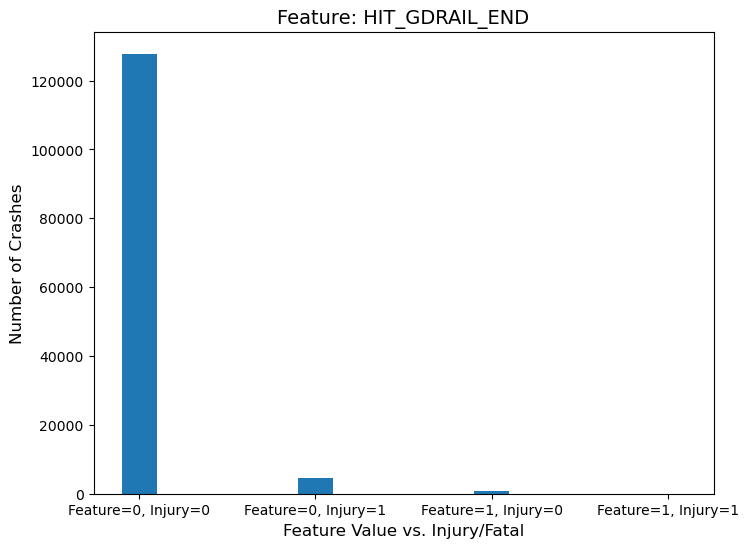

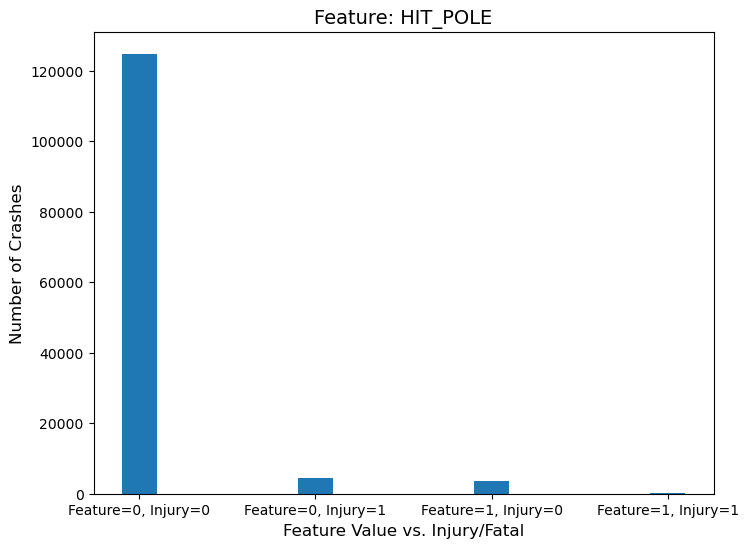

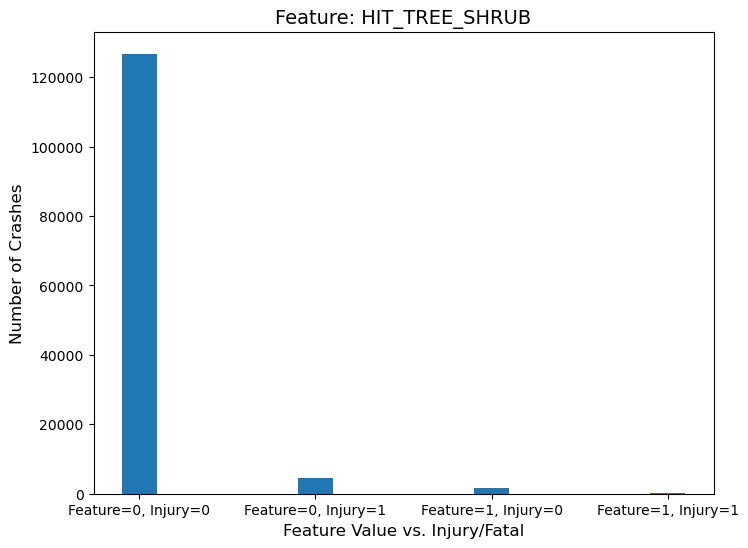

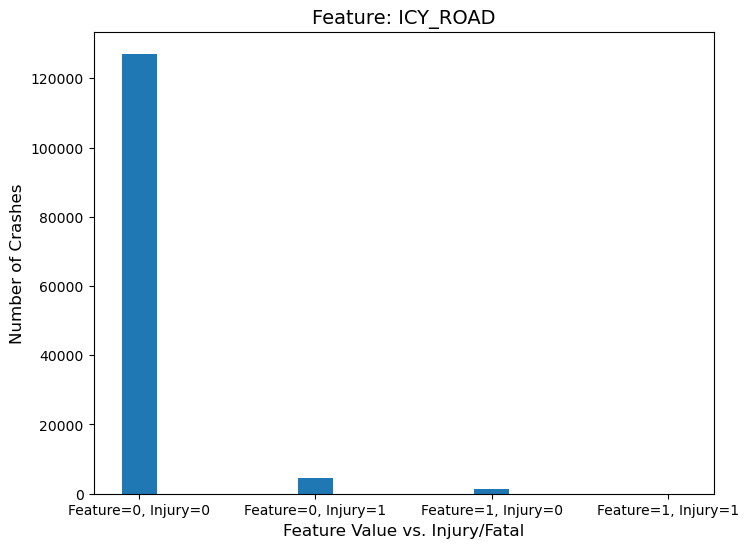

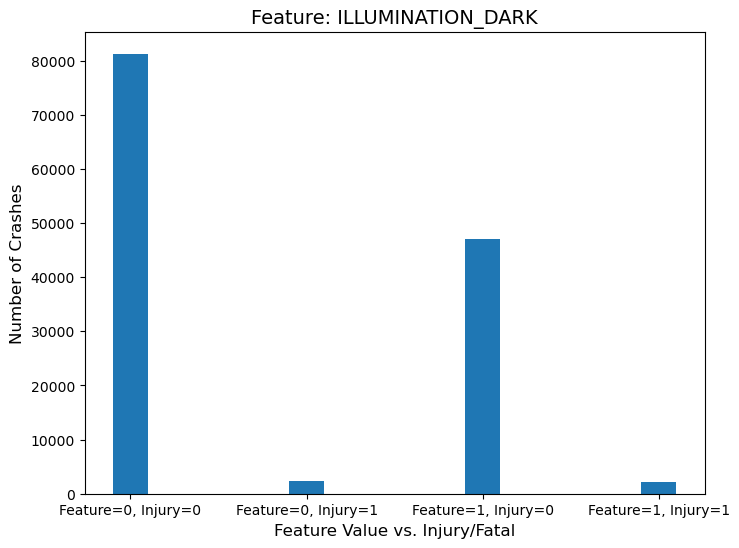

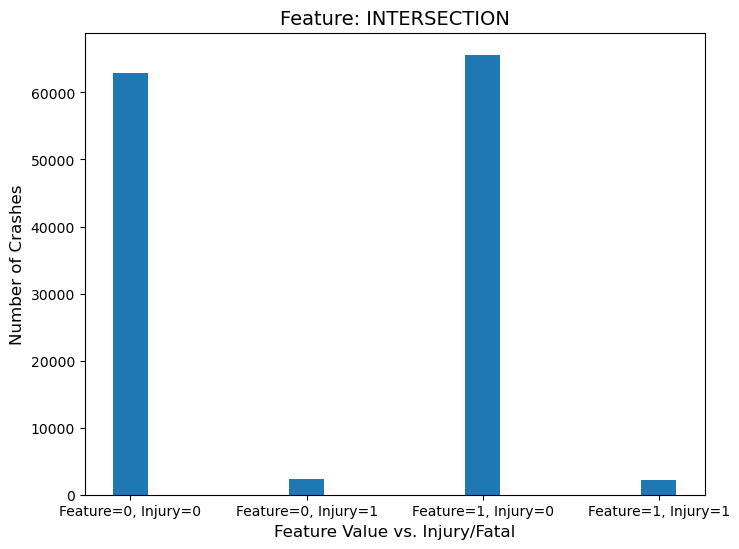

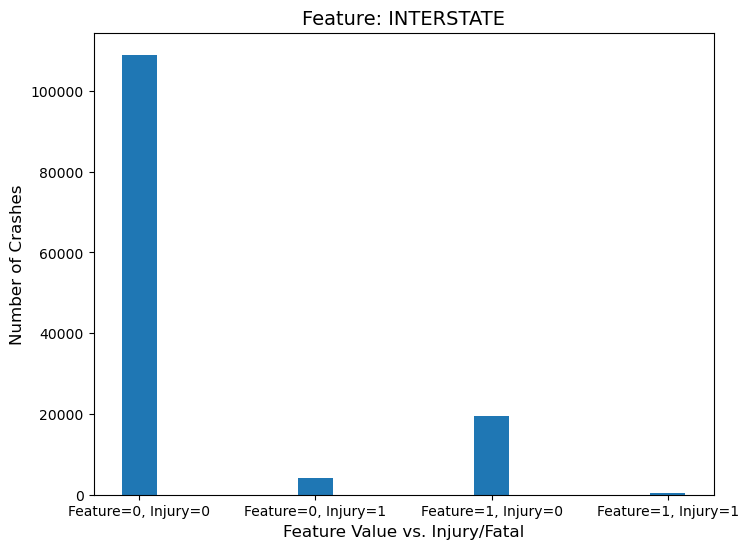

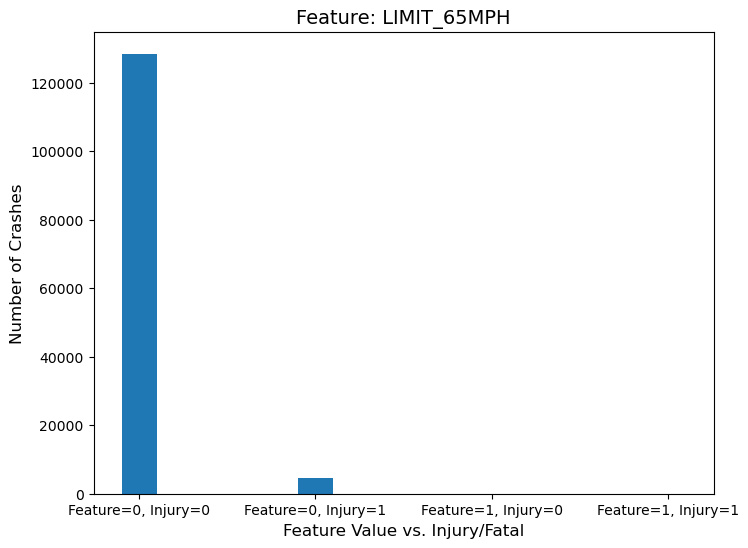

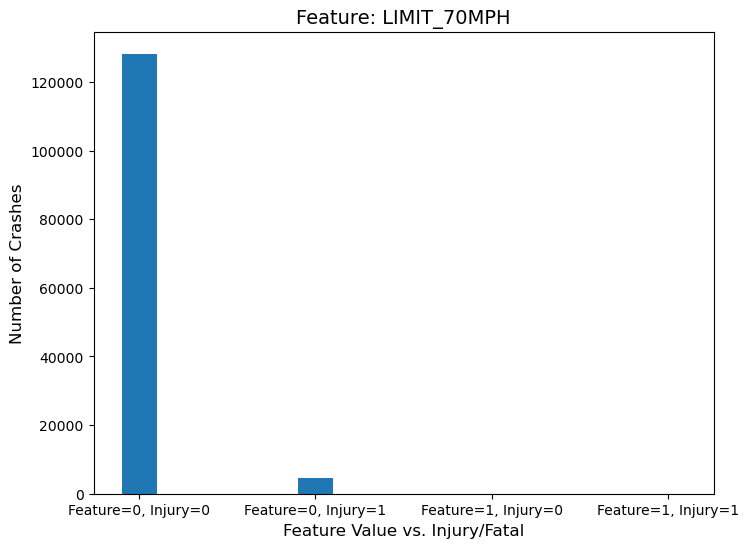

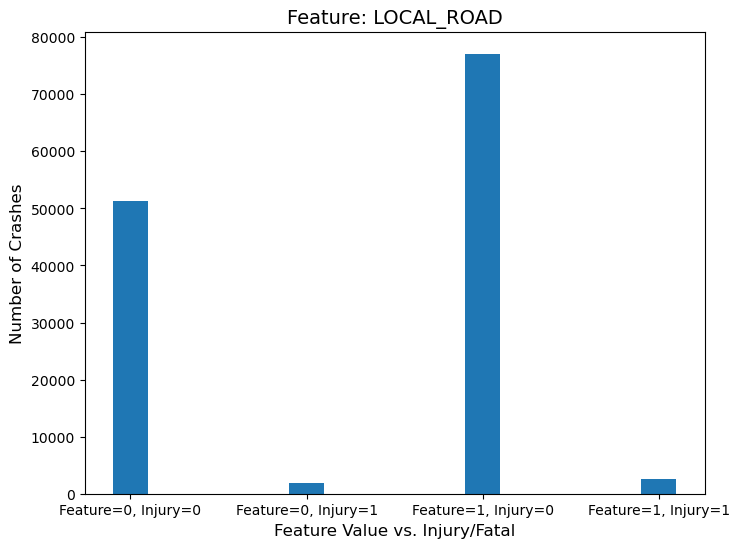

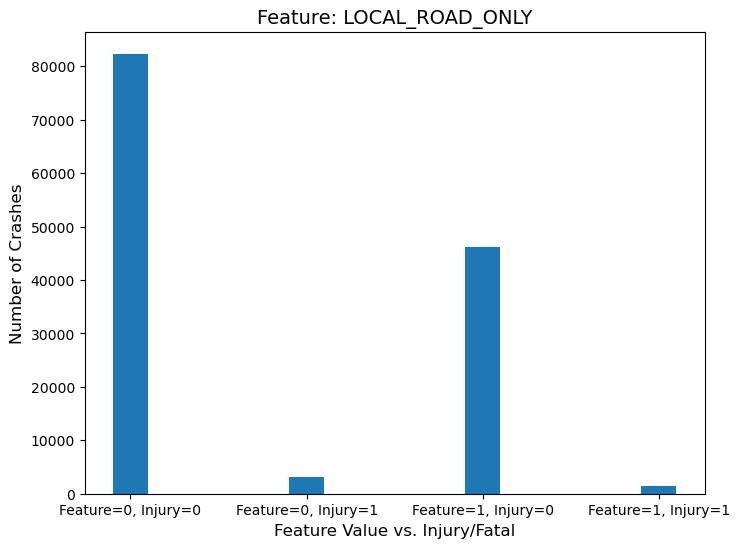

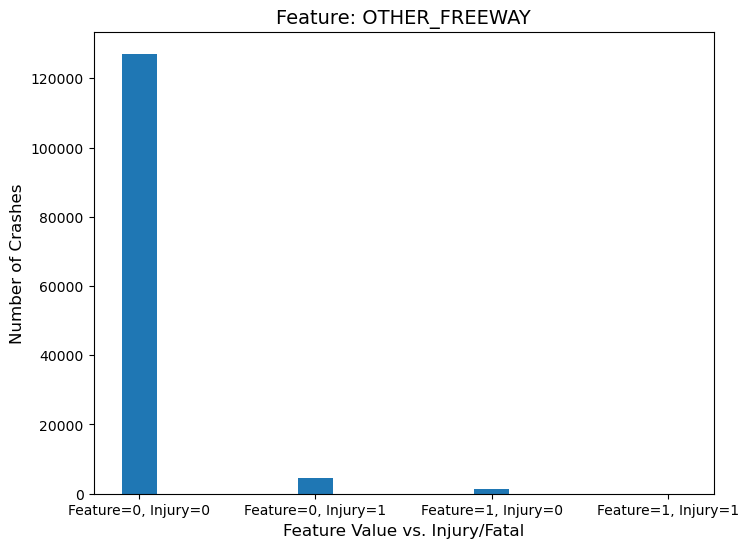

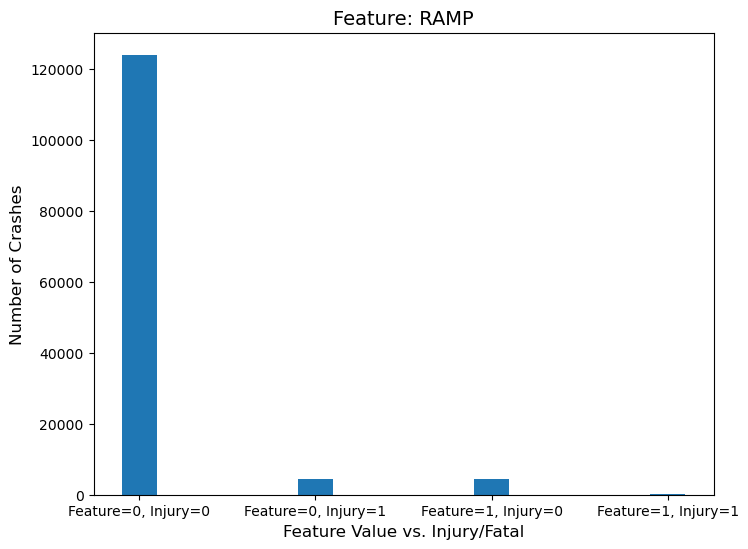

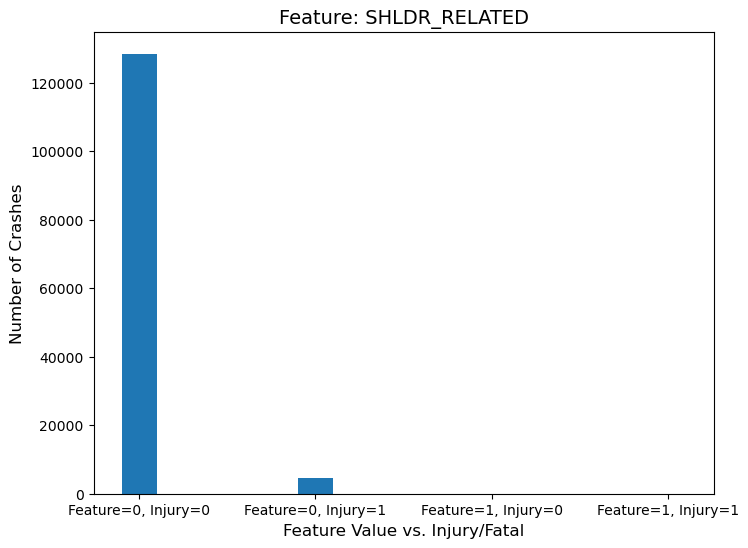

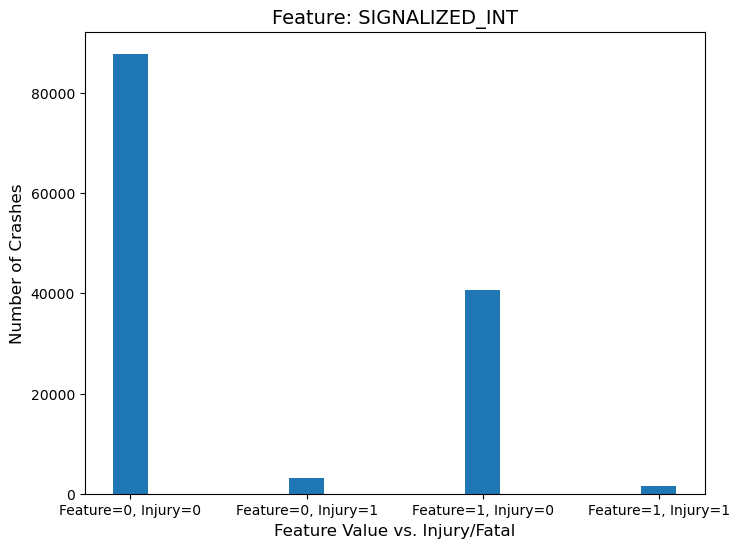

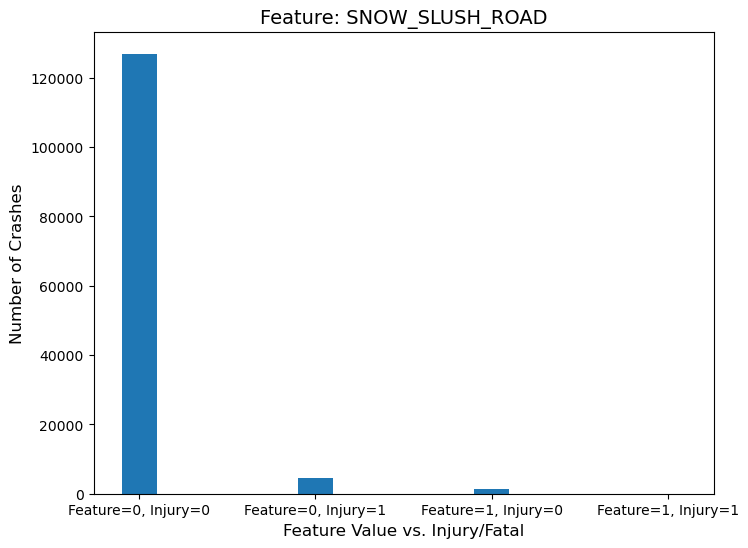

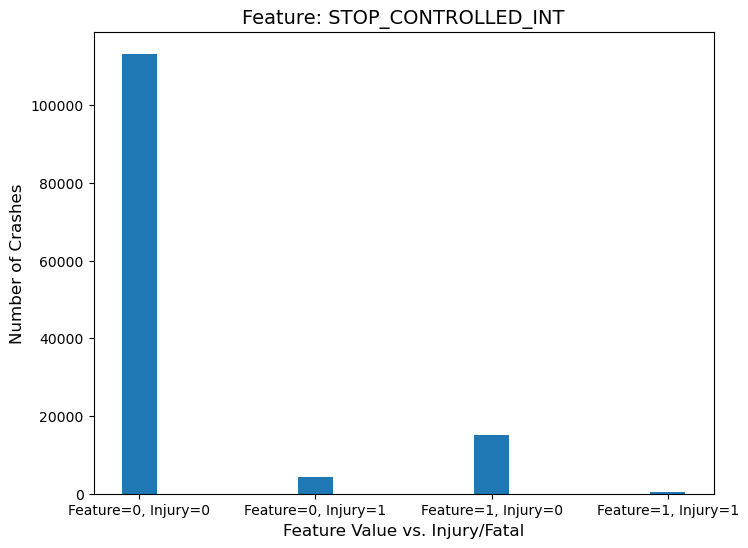

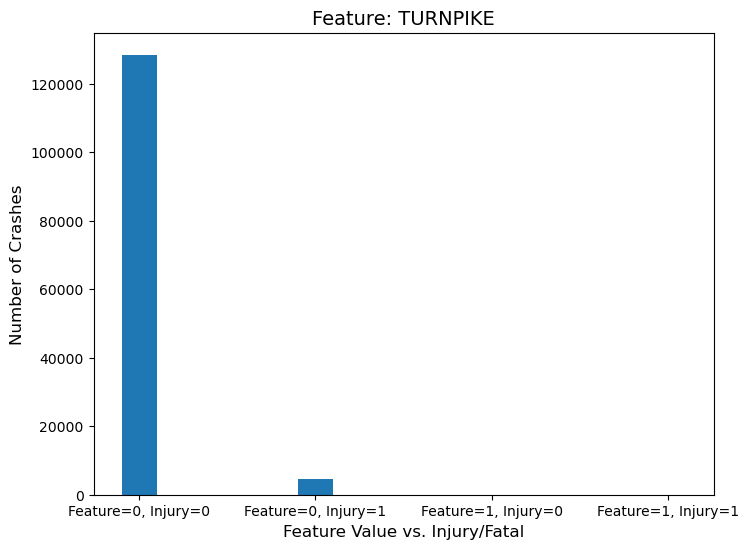

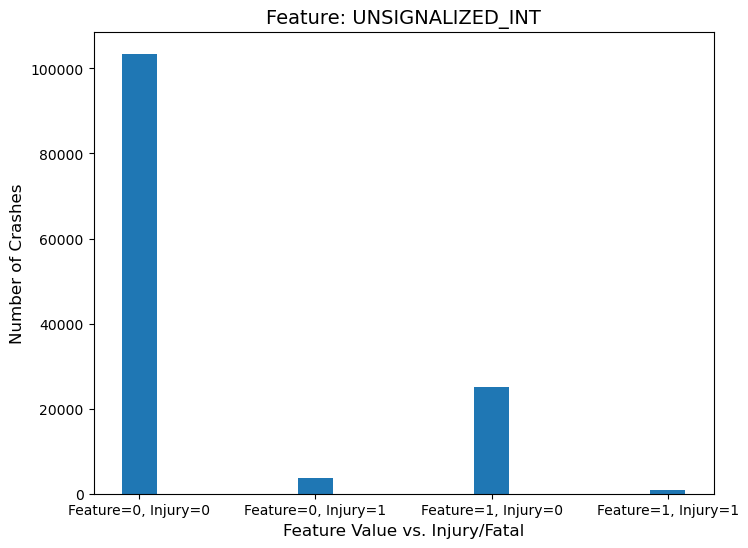

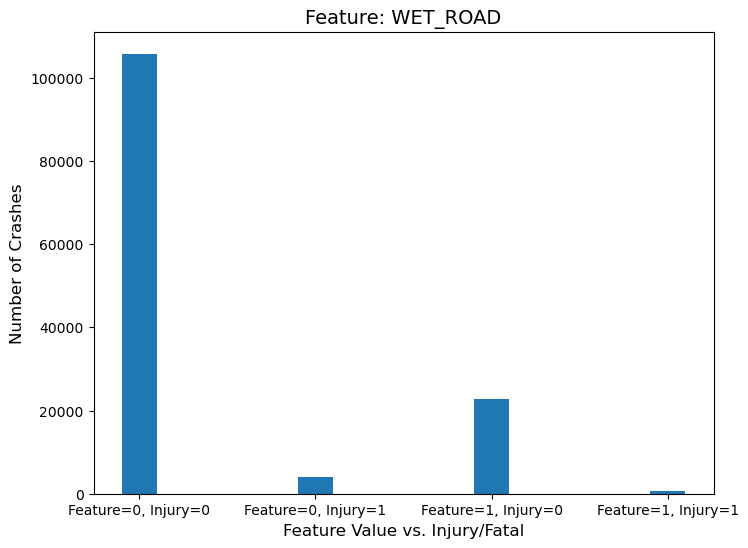

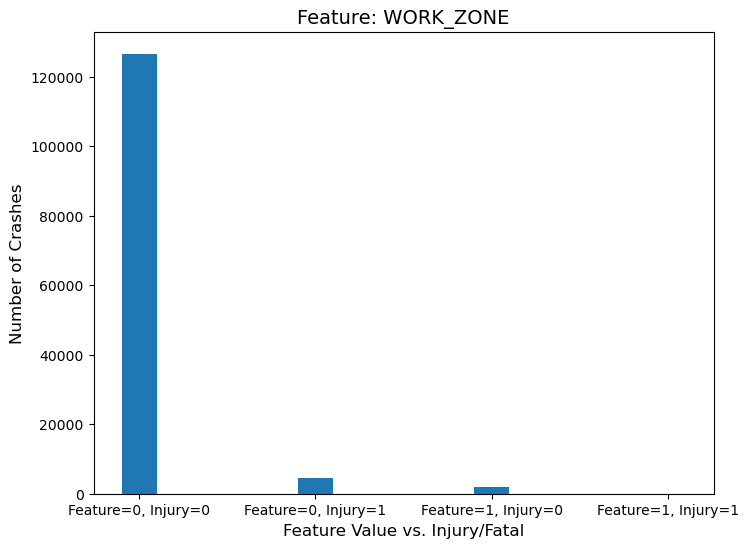

In [118]:
features = [ 'CURVED_ROAD', 'HIT_BARRIER', 'HIT_BRIDGE', 'HIT_EMBANKMENT', 
                           'HIT_GDRAIL', 'HIT_GDRAIL_END', 'HIT_POLE', 'HIT_TREE_SHRUB', 'ICY_ROAD', 'ILLUMINATION_DARK',
                          'INTERSECTION', 'INTERSTATE', 'LIMIT_65MPH', 'LIMIT_70MPH', 'LOCAL_ROAD', 'LOCAL_ROAD_ONLY',
                          'OTHER_FREEWAY', 'RAMP', 'SHLDR_RELATED', 'SIGNALIZED_INT', 'SNOW_SLUSH_ROAD', 'STOP_CONTROLLED_INT',
                          'TURNPIKE', 'UNSIGNALIZED_INT', 'WET_ROAD', 'WORK_ZONE']


# Initialize lists to store counts
zero_zero_counts = []
zero_one_counts = []
one_zero_counts = []
one_one_counts = []

# Loop through the features and calculate the counts
for feature in features:
    zero_zero = len(df[(df[feature] == 0) & (df['FATAL_OR_SUSP_SERIOUS_INJ'] == 0)])
    zero_one = len(df[(df[feature] == 0) & (df['FATAL_OR_SUSP_SERIOUS_INJ'] == 1)])
    one_zero = len(df[(df[feature] == 1) & (df['FATAL_OR_SUSP_SERIOUS_INJ'] == 0)])
    one_one = len(df[(df[feature] == 1) & (df['FATAL_OR_SUSP_SERIOUS_INJ'] == 1)])
    
    zero_zero_counts.append(zero_zero)
    zero_one_counts.append(zero_one)
    one_zero_counts.append(one_zero)
    one_one_counts.append(one_one)

    # Set up the bar plot
    fig, ax = plt.subplots(figsize=(8, 6))
    bar_width = 0.2
    index = range(4)

    # Plot the bars
    ax.bar(index, [zero_zero, zero_one, one_zero, one_one], bar_width)

    # Set the axis labels, ticks, and title
    ax.set_xlabel('Feature Value vs. Injury/Fatal', fontsize=12)
    ax.set_ylabel('Number of Crashes', fontsize=12)
    ax.set_xticks(index)
    ax.set_xticklabels(['Feature=0, Injury=0', 'Feature=0, Injury=1', 'Feature=1, Injury=0', 'Feature=1, Injury=1'], fontsize=10)
    ax.set_title('Feature: {}'.format(feature), fontsize=14)

    # Display the plot
    plt.show()


In [97]:
nan_count = df.isna().sum()
print(nan_count)

df = df.dropna()

CRN                    0
INJURY_OR_FATAL        0
CURVED_ROAD            0
HIT_BARRIER            0
HIT_BRIDGE             0
HIT_EMBANKMENT         0
HIT_GDRAIL             0
HIT_GDRAIL_END         0
HIT_POLE               0
HIT_TREE_SHRUB         0
ICY_ROAD               0
ILLUMINATION_DARK      0
INTERSECTION           0
INTERSTATE             0
LIMIT_65MPH            0
LIMIT_70MPH            0
LOCAL_ROAD             0
LOCAL_ROAD_ONLY        0
OTHER_FREEWAY          0
RAMP                   0
SHLDR_RELATED          0
SIGNALIZED_INT         0
SNOW_SLUSH_ROAD        0
STOP_CONTROLLED_INT    0
TURNPIKE               0
UNSIGNALIZED_INT       0
WET_ROAD               0
WORK_ZONE              0
dtype: int64


In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

y = df['INJURY_OR_FATAL']

X = df.drop(['CRN', 'INJURY_OR_FATAL'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a logistic regression model and fit it to the training data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = logreg.predict(X_test)

# Evaluate the model's accuracy
accuracy = logreg.score(X_test, y_test)

In [99]:
accuracy

0.7171097221176294

ROC curve:
AUC: 0.5354238110320075
RMSE: 0.5318743064694615


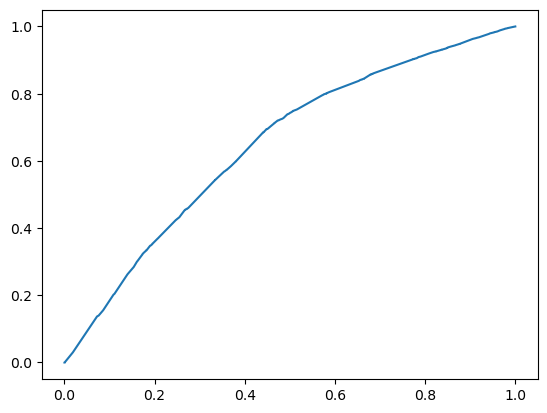

In [100]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, mean_squared_error

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
roc_auc = roc_auc_score(y_test, y_pred)
print('ROC curve:')
print('AUC:', roc_auc)
plt.plot(fpr, tpr)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)

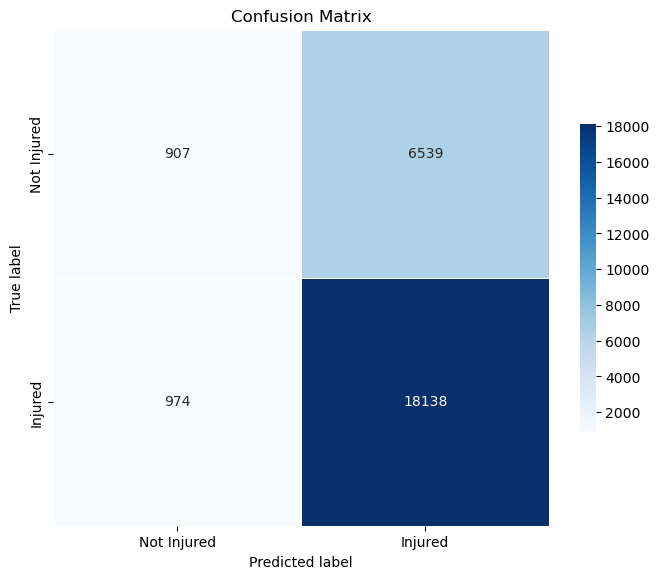

In [101]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", square=True,
            xticklabels=['Not Injured', 'Injured'], yticklabels=['Not Injured', 'Injured'],
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [102]:
# Get the coefficients from the logistic regression model
coef = logreg.coef_[0]

# Create a DataFrame to display the coefficients with their corresponding feature names
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coef})

# Sort the coefficients in descending order of magnitude
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Print the coefficients DataFrame
print(coef_df)


                Feature  Coefficient
10         INTERSECTION     0.345418
12          LIMIT_65MPH     0.232949
19       SIGNALIZED_INT     0.223033
23     UNSIGNALIZED_INT     0.122384
7        HIT_TREE_SHRUB     0.089897
21  STOP_CONTROLLED_INT     0.051801
16        OTHER_FREEWAY     0.024062
13          LIMIT_70MPH     0.000000
22             TURNPIKE     0.000000
14           LOCAL_ROAD    -0.048294
15      LOCAL_ROAD_ONLY    -0.049331
3        HIT_EMBANKMENT    -0.051696
1           HIT_BARRIER    -0.113086
18        SHLDR_RELATED    -0.114649
25            WORK_ZONE    -0.125584
4            HIT_GDRAIL    -0.138357
0           CURVED_ROAD    -0.159261
24             WET_ROAD    -0.164896
5        HIT_GDRAIL_END    -0.308192
6              HIT_POLE    -0.341413
8              ICY_ROAD    -0.421901
9     ILLUMINATION_DARK    -0.430661
2            HIT_BRIDGE    -0.503604
17                 RAMP    -0.517613
20      SNOW_SLUSH_ROAD    -0.532922
11           INTERSTATE    -0.694448


In [86]:
driver_condition_features = ['CRN', 'INJURY_OR_FATAL','AGGRESSIVE_DRIVING', 'ALCOHOL_RELATED', 'CELL_PHONE', 'CROSS_MEDIAN', 'CURVE_DVR_ERROR',
                            'DISTRACTED', 'DRINKING_DRIVER', 'DRUG_RELATED', 'DRUGGED_DRIVER', 'FATIGUE_ASLEEP', 'LANE_DEPARTURE', 'LEFT_TURN', 'NO_CLEARANCE',
                            'RUNNING_RED_LT', 'RUNNING_STOP_SIGN', 'SPEEDING_RELATED', 'TAILGATING', 'UNBELTED', 'UNLICENSED']

df_2 = crash_flag.loc[:, driver_condition_features]

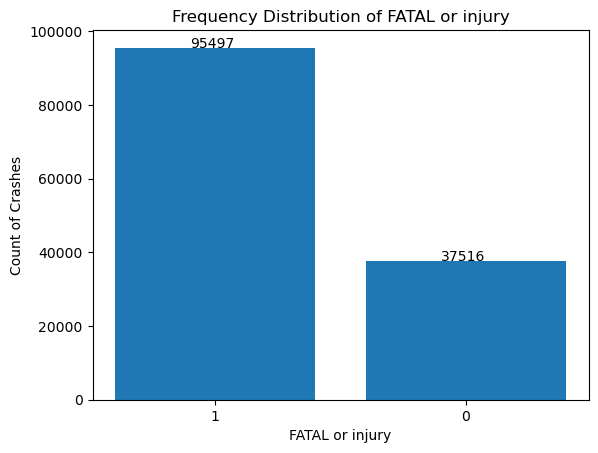

In [85]:
#Looking at the number of fatal accidents
import matplotlib.pyplot as plt

# Count the number of occurrences of each value
fatal_counts = crash_flag['INJURY_OR_FATAL'].value_counts()

# Create a bar chart of the frequency distribution
plt.bar(fatal_counts.index.astype(str), fatal_counts.values)

# Show the counts above each bar
for i, v in enumerate(fatal_counts.values):
    plt.text(i - 0.1, v + 50, str(v))

# Add title and axis labels
plt.title('Frequency Distribution of FATAL or injury')
plt.xlabel('FATAL or injury')
plt.ylabel('Count of Crashes')

# Display the chart
plt.show()

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

y = df_2['INJURY_OR_FATAL']

X = df_2.drop(['CRN', 'INJURY_OR_FATAL'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a logistic regression model and fit it to the training data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = logreg.predict(X_test)

# Evaluate the model's accuracy
accuracy = logreg.score(X_test, y_test)

In [88]:
accuracy

0.7169868059993234

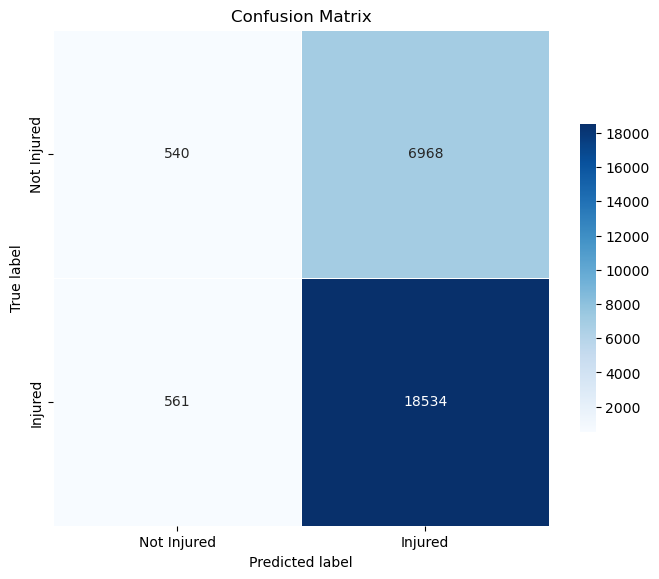

In [89]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", square=True,
            xticklabels=['Not Injured', 'Injured'], yticklabels=['Not Injured', 'Injured'],
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [90]:
# Get the coefficients from the logistic regression model
coef = logreg.coef_[0]

# Create a DataFrame to display the coefficients with their corresponding feature names
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coef})

# Sort the coefficients in descending order of magnitude
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Print the coefficients DataFrame
print(coef_df)


               Feature  Coefficient
1      ALCOHOL_RELATED     2.218393
7         DRUG_RELATED     1.518170
17            UNBELTED     0.445981
18          UNLICENSED     0.408555
11           LEFT_TURN     0.357947
14   RUNNING_STOP_SIGN     0.307165
3         CROSS_MEDIAN     0.267781
13      RUNNING_RED_LT     0.226963
12        NO_CLEARANCE     0.174324
2           CELL_PHONE     0.097402
16          TAILGATING     0.073123
4      CURVE_DVR_ERROR    -0.097052
0   AGGRESSIVE_DRIVING    -0.165933
5           DISTRACTED    -0.317632
15    SPEEDING_RELATED    -0.392081
9       FATIGUE_ASLEEP    -0.401192
10      LANE_DEPARTURE    -0.546527
8       DRUGGED_DRIVER    -1.519097
6      DRINKING_DRIVER    -2.642684


<b> Heatmap for fatalities </b>

In [91]:
crns_fatal = crash_flag.loc[crash_flag['FATAL'] == 1, 'CRN'].tolist()


In [92]:
crash_general_fatal = crash_general[crash_general['CRN'].isin(crns_fatal)]


In [140]:
import folium
from folium.plugins import HeatMap

# Create a map centered on Philadelphia
map_center = [39.9526, -75.1652]
crash_map = folium.Map(location=map_center, zoom_start=10)

# Create a list of coordinates from the crash data
crash_locations = crash_general_fatal[['DEC_LAT', 'DEC_LONG']].values.tolist()

# Create a heatmap layer from the coordinates
heatmap_layer = HeatMap(crash_locations)

# Add the heatmap layer to the map
heatmap_layer.add_to(crash_map)

# Display the map
crash_map

Road conditions for trees and the second one should be for driver behaviour

In [127]:
# Initialises the dataframe for crashes (flag variables file)
crashes = crash_flag[['CRN', 'FATAL_OR_SUSP_SERIOUS_INJ', 'INJURY_OR_FATAL',
                      'CORE_NETWORK', 'CURVED_ROAD', 'HIT_BARRIER', 'HIT_BRIDGE', 'HIT_EMBANKMENT',
                      'HIT_GDRAIL', 'HIT_GDRAIL_END', 'HIT_POLE', 'HIT_TREE_SHRUB', 'ICY_ROAD',
                      'ILLUMINATION_DARK', 'INTERSECTION', 'INTERSTATE', 'LIMIT_65MPH', 'LIMIT_70MPH',
                      'LOCAL_ROAD', 'LOCAL_ROAD_ONLY', 'OTHER_FREEWAY', 'RAMP', 'SHLDR_RELATED',
                      'SIGNALIZED_INT', 'SNOW_SLUSH_ROAD', 'STOP_CONTROLLED_INT', 'TURNPIKE',
                      'UNSIGNALIZED_INT', 'WET_ROAD', 'WORK_ZONE']]
crashes.dropna(inplace=True)
crashes.reset_index(drop=True)

ratio_inj_fatality = []

ratio_fatality = []

# Initialises list of all possible variables (removed LIMIT_70MPH and TURNPIKE as no crashes related to these variables)
variables = ['CORE_NETWORK', 'CURVED_ROAD', 'HIT_BARRIER', 'HIT_BRIDGE', 'HIT_EMBANKMENT',
            'HIT_GDRAIL', 'HIT_GDRAIL_END', 'HIT_POLE', 'HIT_TREE_SHRUB', 'ICY_ROAD',
            'ILLUMINATION_DARK', 'INTERSECTION', 'INTERSTATE', 'LIMIT_65MPH',
            'LOCAL_ROAD', 'LOCAL_ROAD_ONLY', 'OTHER_FREEWAY', 'RAMP', 'SHLDR_RELATED',
            'SIGNALIZED_INT', 'SNOW_SLUSH_ROAD', 'STOP_CONTROLLED_INT',
            'UNSIGNALIZED_INT', 'WET_ROAD', 'WORK_ZONE']

# Counts the number of non-fatal crashes
non_fatal_crashes = crashes.query('FATAL_OR_SUSP_SERIOUS_INJ == 0').reset_index(drop=True)
number_non_fatal = len(non_fatal_crashes)

# Counts the number of fatal crashes
fatal_crashes = crashes.query('FATAL_OR_SUSP_SERIOUS_INJ == 1').reset_index(drop=True)
number_fatal = len(fatal_crashes)

# Counts the number of non-injury related crashes
non_injury_crashes = crashes.query('INJURY_OR_FATAL == 0').reset_index(drop=True)
number_non_injury = len(non_injury_crashes)

# Counts the number of injury related crashes
injury_crashes = crashes.query('INJURY_OR_FATAL == 1').reset_index(drop=True)
number_injury = len(injury_crashes)

# Counts fatality ratio for all possible reasons related to roads
for reason in variables:

    # Df for all crashes
    crash_reason = crashes.query(f'{reason} == 1').reset_index(drop=True)
    number_crash_reason = len(crash_reason)
    print(f"Crashes due to {reason}:", number_crash_reason)
    print()

    # Df for all crashes which are fatal + injury
    injury_crash_reason = injury_crashes.query(f'{reason} == 1').reset_index(drop=True)
    number_injury_crash_reason = len(injury_crash_reason)
    print(f"Injury + Fatal crashes due to {reason}:", number_injury_crash_reason)

    print("Ratio of injury + fatality:", (number_injury_crash_reason / number_crash_reason))
    ratio_inj_fatality.append((number_injury_crash_reason / number_crash_reason))

    # Df for all crashes which are fatal
    fatal_crash_reason = fatal_crashes.query(f'{reason} == 1').reset_index(drop=True)
    number_fatal_crash_reason = len(fatal_crash_reason)
    print(f"Fatal crashes due to {reason}:", number_fatal_crash_reason)

    print("Ratio of fatality:", (number_fatal_crash_reason / number_crash_reason))
    ratio_fatality.append((number_fatal_crash_reason / number_crash_reason))
    print()

C:\Users\ekmho\AppData\Local\Temp\ipykernel_2576\2347602664.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crashes.dropna(inplace=True)


Crashes due to CORE_NETWORK: 26365

Injury + Fatal crashes due to CORE_NETWORK: 15309
Ratio of injury + fatality: 0.5806561729565712
Fatal crashes due to CORE_NETWORK: 637
Ratio of fatality: 0.024160819267968897

Crashes due to CURVED_ROAD: 9899

Injury + Fatal crashes due to CURVED_ROAD: 5850
Ratio of injury + fatality: 0.5909687847257299
Fatal crashes due to CURVED_ROAD: 420
Ratio of fatality: 0.042428528134154965

Crashes due to HIT_BARRIER: 8968

Injury + Fatal crashes due to HIT_BARRIER: 4607
Ratio of injury + fatality: 0.5137154326494202
Fatal crashes due to HIT_BARRIER: 220
Ratio of fatality: 0.024531668153434435

Crashes due to HIT_BRIDGE: 278

Injury + Fatal crashes due to HIT_BRIDGE: 157
Ratio of injury + fatality: 0.564748201438849
Fatal crashes due to HIT_BRIDGE: 16
Ratio of fatality: 0.05755395683453238

Crashes due to HIT_EMBANKMENT: 494

Injury + Fatal crashes due to HIT_EMBANKMENT: 296
Ratio of injury + fatality: 0.5991902834008097
Fatal crashes due to HIT_EMBANKMENT: 2

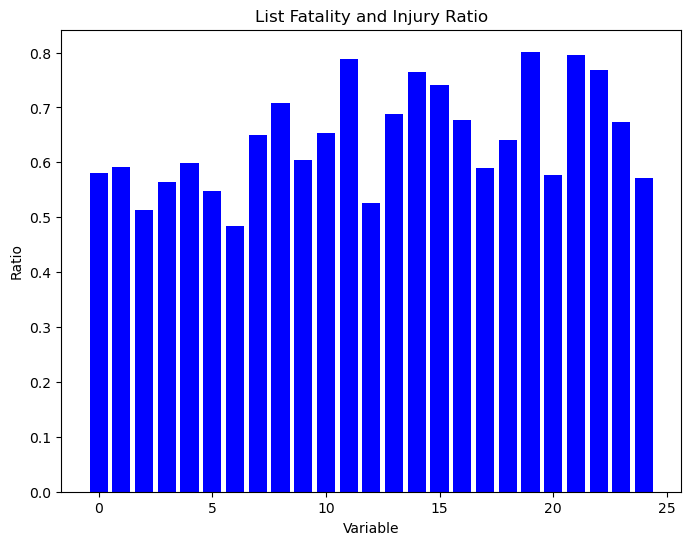

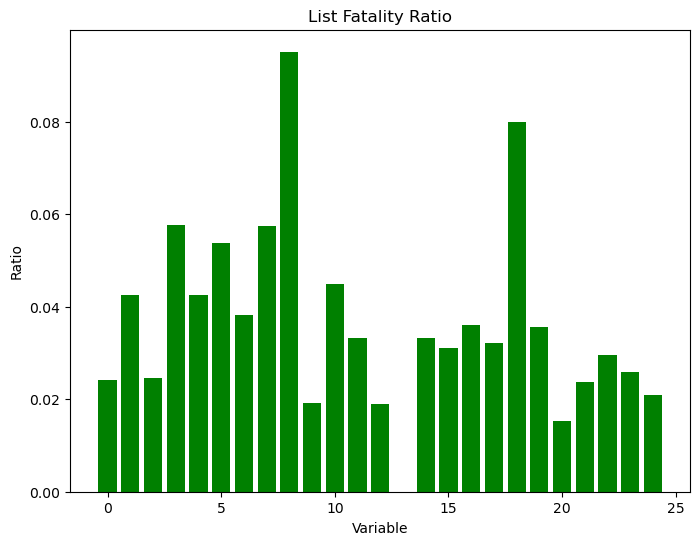

,Key,Variable
0,1,CORE_NETWORK
1,2,CURVED_ROAD
2,3,HIT_BARRIER
3,4,HIT_BRIDGE
4,5,HIT_EMBANKMENT
5,6,HIT_GDRAIL
6,7,HIT_GDRAIL_END
7,8,HIT_POLE
8,9,HIT_TREE_SHRUB
9,10,ICY_ROAD


In [136]:

# Plot the ratios for the first list
plt.figure(figsize=(8, 6))
plt.bar(x_ticks, ratio_inj_fatality, color='blue', label='Fatality and Injury Ratio')
plt.title('List Fatality and Injury Ratio')
plt.xlabel('Variable')
plt.ylabel('Ratio')
plt.show()

# Plot the ratios for the second list
plt.figure(figsize=(8, 6))
plt.bar(x_ticks, ratio_fatality, color='green', label='Fatality Ratio')
plt.title('List Fatality Ratio')
plt.xlabel('Variable')
plt.ylabel('Ratio')
plt.show()

# Create a dictionary with index values and variables
data = {'Key': list(range(1, len(variables)+1)), 'Variable': variables}

# Create a pandas dataframe from the dictionary
df = pd.DataFrame(data)

df

In [175]:
crash_roadway = pd.read_csv('C:/Users/ekmho/Documents/GitHub/Europe Regional 2023 Datasets/Crashes/crash_info_roadway.csv')

C:\Users\ekmho\AppData\Local\Temp\ipykernel_2576\3493929805.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  crash_roadway = pd.read_csv('C:/Users/ekmho/Documents/GitHub/Europe Regional 2023 Datasets/Crashes/crash_info_roadway.csv')


In [176]:
roadway_variables = crash_roadway.groupby('CRN')[['LANE_COUNT', 'SPEED_LIMIT']].mean()
#Fatal or serious crns variable is fatal_or_serious_crns

In [177]:
roadway_variables

,LANE_COUNT,SPEED_LIMIT
CRN,,
2010001139,2.0,35.0
2010004457,3.0,55.0
2010005005,2.0,25.0
2010005037,2.0,45.0
2010005373,3.0,50.0
...,...,...
2022080203,4.0,50.0
2022082004,1.0,NaN
2022085502,99.0,20.0


In [178]:
nan_count = roadway_variables.isna().sum()
print(nan_count)

LANE_COUNT        1
SPEED_LIMIT    7820
dtype: int64


In [179]:
roadway_variables.describe()

,LANE_COUNT,SPEED_LIMIT
count,133089.000000,125270.000000
mean,3.004051,32.531110
std,8.121736,10.541865
min,1.000000,10.000000
25%,2.000000,25.000000
50%,2.000000,30.000000
75%,2.500000,35.000000
max,99.000000,65.000000


In [180]:
# Calculate the mean and standard deviation of the LANE_COUNT column
median_lane_count = roadway_variables['LANE_COUNT'].median()
std_lane_count = roadway_variables['LANE_COUNT'].std()

# Calculate the lower and upper bounds for outliers
lower_bound = median_lane_count - 3 * std_lane_count
upper_bound = median_lane_count + 3 * std_lane_count

# Replace outliers with mean value
roadway_variables.loc[roadway_variables['LANE_COUNT'] < lower_bound, 'LANE_COUNT'] = median_lane_count
roadway_variables.loc[roadway_variables['LANE_COUNT'] > upper_bound, 'LANE_COUNT'] = median_lane_count

In [181]:
roadway_variables.describe()

,LANE_COUNT,SPEED_LIMIT
count,133089.000000,125270.000000
mean,2.171492,32.531110
std,0.897704,10.541865
min,1.000000,10.000000
25%,2.000000,25.000000
50%,2.000000,30.000000
75%,2.333333,35.000000
max,26.250000,65.000000


In [182]:
#Impute values for the outliers and NaN values

# Replace outliers with median for LANE_COUNT
lane_median = crash_roadway['LANE_COUNT'].median()
q1 = crash_roadway['LANE_COUNT'].quantile(0.25)
q3 = crash_roadway['LANE_COUNT'].quantile(0.75)
iqr = q3 - q1
crash_roadway['LANE_COUNT'] = np.where(crash_roadway['LANE_COUNT'] > (q3 + 3*iqr), lane_median, crash_roadway['LANE_COUNT'])
crash_roadway['LANE_COUNT'] = np.where(crash_roadway['LANE_COUNT'] < (q1 - 3*iqr), lane_median, crash_roadway['LANE_COUNT'])
crash_roadway['LANE_COUNT'] = crash_roadway['LANE_COUNT'].fillna(lane_median)

#Replace Nan speed limits with the median
crash_roadway['SPEED_LIMIT'].fillna(crash_roadway['SPEED_LIMIT'].median(), inplace=True)


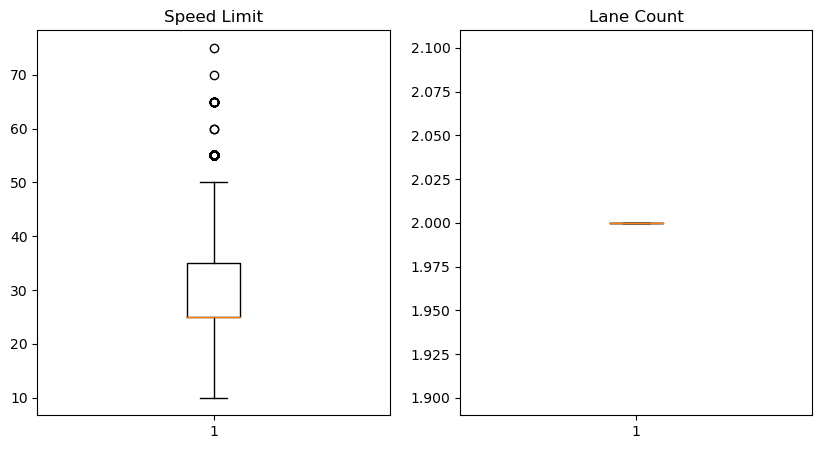

In [183]:

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the speed limit data on the first subplot
ax1.boxplot(crash_roadway['SPEED_LIMIT'].fillna(crash_roadway['SPEED_LIMIT'].median()))
ax1.set_title('Speed Limit')

# Plot the lane count data on the second subplot
ax2.boxplot(crash_roadway['LANE_COUNT'].fillna(crash_roadway['LANE_COUNT'].median()))
ax2.set_title('Lane Count')

# Show the plots
plt.show()